In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell

In [2]:
data = pd.read_excel("./优衣库（清洗版）.xls")

In [3]:
data.head()

,商店ID,门店所在城市,渠道,性别群体,年龄群体,产品类别,客户数量,销售金额,订单数量,购买的产品数量,成本,单价,利润,订单日期,星期
0,831.0,杭州,线下,女,20-24,T恤,1.0,59.0,1.0,1.0,49.0,59.0,10.0,2023-01-02,星期一
1,831.0,杭州,线下,女,20-24,袜子,1.0,40.0,1.0,2.0,9.0,20.0,22.0,2023-01-05,星期四
2,831.0,杭州,线下,女,<20,T恤,1.0,79.0,1.0,1.0,49.0,79.0,30.0,2023-01-08,星期日
3,831.0,杭州,线下,男,30-34,T恤,1.0,99.0,1.0,1.0,49.0,99.0,50.0,2023-01-09,星期一
4,831.0,杭州,线下,男,30-34,T恤,1.0,79.0,1.0,1.0,49.0,79.0,30.0,2023-01-09,星期一


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19085 entries, 0 to 19084
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   商店ID     18951 non-null  float64       
 1   门店所在城市   18951 non-null  object        
 2   渠道       18951 non-null  object        
 3   性别群体     18951 non-null  object        
 4   年龄群体     18951 non-null  object        
 5   产品类别     18951 non-null  object        
 6   客户数量     18951 non-null  float64       
 7   销售金额     18951 non-null  float64       
 8   订单数量     18951 non-null  float64       
 9   购买的产品数量  18951 non-null  float64       
 10  成本       18951 non-null  float64       
 11  单价       18951 non-null  float64       
 12  利润       18951 non-null  float64       
 13  订单日期     18951 non-null  datetime64[ns]
 14  星期       18951 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(6)
memory usage: 2.2+ MB


In [5]:
data.isnull().sum()

商店ID       134
门店所在城市     134
渠道         134
性别群体       134
年龄群体       134
产品类别       134
客户数量       134
销售金额       134
订单数量       134
购买的产品数量    134
成本         134
单价         134
利润         134
订单日期       134
星期         134
dtype: int64

In [6]:
# 标记缺失的行
data['is_isnull'] = data.isnull().any(axis=1)

# 筛选出缺失的行
data[data['is_isnull'] ==True]

,商店ID,门店所在城市,渠道,性别群体,年龄群体,产品类别,客户数量,销售金额,订单数量,购买的产品数量,成本,单价,利润,订单日期,星期,is_isnull
527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,True
531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,True
799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,True
982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,True
1439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,True
18783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,True
18885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,True
18919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,True


In [7]:
data.dropna(inplace=True)

In [8]:
print('查看数据集中的重复值：')
data.duplicated().sum()

查看数据集中的重复值：


33

In [9]:
# 标记重复的行
data['is_duplicate'] = data.duplicated(keep=False)

# 筛选出重复的行
data[data['is_duplicate']]

,商店ID,门店所在城市,渠道,性别群体,年龄群体,产品类别,客户数量,销售金额,订单数量,购买的产品数量,成本,单价,利润,订单日期,星期,is_isnull,is_duplicate
349,802.0,西安,线下,女,30-34,T恤,1.0,79.0,1.0,1.0,49.0,79.0,30.0,2023-08-25,星期五,False,True
350,802.0,西安,线下,女,30-34,T恤,1.0,79.0,1.0,1.0,49.0,79.0,30.0,2023-08-25,星期五,False,True
387,796.0,深圳,线下,男,>=60,T恤,1.0,79.0,1.0,1.0,49.0,79.0,30.0,2023-08-12,星期六,False,True
499,796.0,深圳,线下,男,>=60,T恤,1.0,79.0,1.0,1.0,49.0,79.0,30.0,2023-08-12,星期六,False,True
702,759.0,重庆,线下,女,35-39,T恤,1.0,79.0,1.0,1.0,49.0,79.0,30.0,2023-08-13,星期日,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967,437.0,重庆,线下,女,25-29,袜子,1.0,49.0,1.0,1.0,9.0,49.0,40.0,2023-06-11,星期日,False,True
10078,280.0,深圳,线下,男,30-34,T恤,1.0,99.0,1.0,1.0,49.0,99.0,50.0,2023-08-05,星期六,False,True
10079,280.0,深圳,线下,男,30-34,T恤,1.0,99.0,1.0,1.0,49.0,99.0,50.0,2023-08-05,星期六,False,True
12004,229.0,深圳,线下,女,<20,T恤,1.0,99.0,1.0,1.0,49.0,99.0,50.0,2023-06-03,星期六,False,True


In [10]:
data.drop_duplicates(keep='first', inplace=True)

In [11]:
'''
data.select_dtypes(include=['object'])：这部分使用 pandas 的 select_dtypes 方法从 data 数据集中筛选出数据类型为 object 的列。
在 pandas 中，通常 object 类型的列包含字符串，这些列可能是分类变量。
.columns.tolist()：将筛选出的列名转换为一个列表并存储在 characteristic 变量中。
'''
characteristic = data.select_dtypes(include=['object']).columns.tolist() 
for i in characteristic:
    print(f'{i}:')
    print(f'共有:{len(data[i].unique())}条唯一值')
    print(data[i].unique())
    print('-'*50)
    

门店所在城市:
共有:10条唯一值
['杭州' '西安' '深圳' '重庆' '成都' '上海' '武汉' '广州' '北京' '南京']
--------------------------------------------------
渠道:
共有:2条唯一值
['线下' '线上']
--------------------------------------------------
性别群体:
共有:2条唯一值
['女' '男']
--------------------------------------------------
年龄群体:
共有:10条唯一值
['20-24' '<20' '30-34' '25-29' '40-44' '45-49' '35-39' '>=60' '55-59'
 '50-54']
--------------------------------------------------
产品类别:
共有:9条唯一值
['T恤' '袜子' '当季新品' '短裤' '毛衣' '裙子' '配件' '运动' '牛仔裤']
--------------------------------------------------
星期:
共有:7条唯一值
['星期一' '星期四' '星期日' '星期五' '星期六' '星期三' '星期二']
--------------------------------------------------


In [12]:
# 计算样本利润
sample_profit = data['销售金额'] - (data['成本'] * data['购买的产品数量'])
# 计算样本利润与实际利润之间的差异
diff = abs(sample_profit - data['利润'])
# 打印最大差异
print(f"最大差异: {diff.max():.4f}")
if diff.max() == 0: 
    print("利润计算正确")
else:
    print("利润计算可能存在问题")      


最大差异: 0.0000
利润计算正确


In [13]:
#再次查看数据所有信息
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18918 entries, 0 to 19084
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   商店ID          18918 non-null  float64       
 1   门店所在城市        18918 non-null  object        
 2   渠道            18918 non-null  object        
 3   性别群体          18918 non-null  object        
 4   年龄群体          18918 non-null  object        
 5   产品类别          18918 non-null  object        
 6   客户数量          18918 non-null  float64       
 7   销售金额          18918 non-null  float64       
 8   订单数量          18918 non-null  float64       
 9   购买的产品数量       18918 non-null  float64       
 10  成本            18918 non-null  float64       
 11  单价            18918 non-null  float64       
 12  利润            18918 non-null  float64       
 13  订单日期          18918 non-null  datetime64[ns]
 14  星期            18918 non-null  object        
 15  is_isnull     18918 non-null  bool       

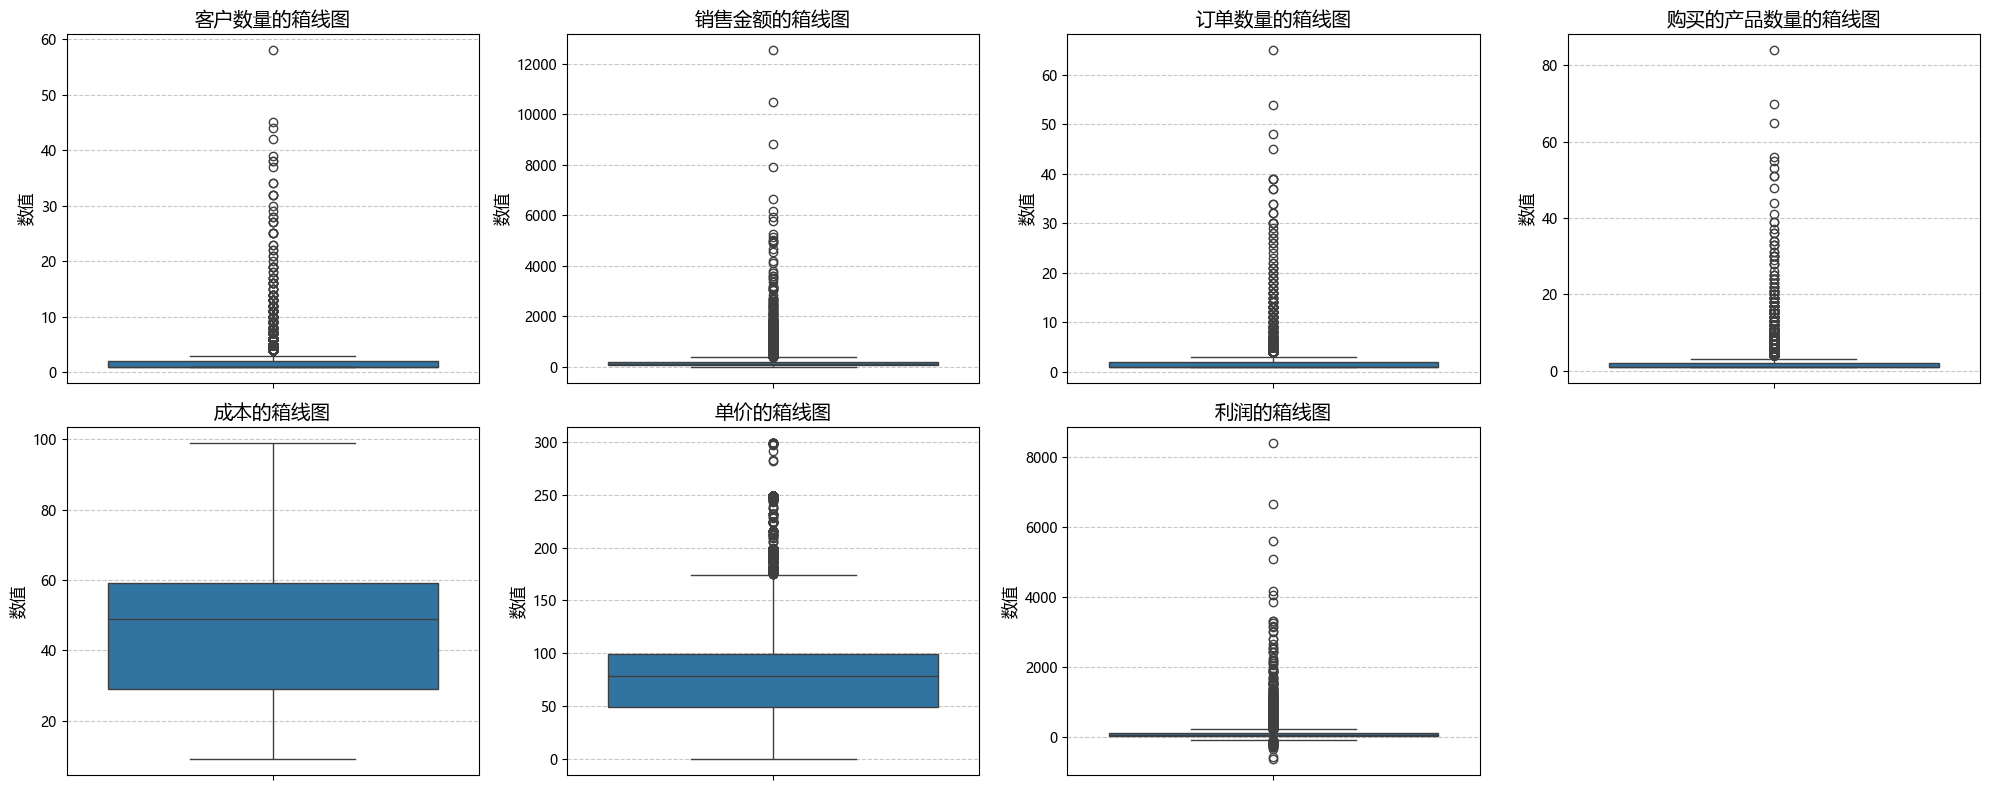

In [19]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #显示中文标签
plt.rcParams['axes.unicode_minus'] = False #显示负号
feature_map = {
    '客户数量': '客户数量',
    '销售金额': '销售金额',
    '订单数量': '订单数量',
    '购买的产品数量': '购买的产品数量',
    '成本': '成本',
    '单价': '单价',
    '利润': '利润'
}
feature_map.items()
plt.figure(figsize=(20,8))
for i, (col, col_name) in enumerate(feature_map.items(), 1):
    plt.subplot(2,4,i)
    sns.boxplot(y=data[col])
    plt.title(f'{col_name}的箱线图', fontsize=14)
    plt.ylabel('数值', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18918 entries, 0 to 19084
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   商店ID          18918 non-null  float64       
 1   门店所在城市        18918 non-null  object        
 2   渠道            18918 non-null  object        
 3   性别群体          18918 non-null  object        
 4   年龄群体          18918 non-null  object        
 5   产品类别          18918 non-null  object        
 6   客户数量          18918 non-null  float64       
 7   销售金额          18918 non-null  float64       
 8   订单数量          18918 non-null  float64       
 9   购买的产品数量       18918 non-null  float64       
 10  成本            18918 non-null  float64       
 11  单价            18918 non-null  float64       
 12  利润            18918 non-null  float64       
 13  订单日期          18918 non-null  datetime64[ns]
 14  星期            18918 non-null  object        
 15  is_isnull     18918 non-null  bool       

In [23]:
data['商店ID'] = data['商店ID'].astype('object')


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18918 entries, 0 to 19084
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   商店ID          18918 non-null  object        
 1   门店所在城市        18918 non-null  object        
 2   渠道            18918 non-null  object        
 3   性别群体          18918 non-null  object        
 4   年龄群体          18918 non-null  object        
 5   产品类别          18918 non-null  object        
 6   客户数量          18918 non-null  float64       
 7   销售金额          18918 non-null  float64       
 8   订单数量          18918 non-null  float64       
 9   购买的产品数量       18918 non-null  float64       
 10  成本            18918 non-null  float64       
 11  单价            18918 non-null  float64       
 12  利润            18918 non-null  float64       
 13  订单日期          18918 non-null  datetime64[ns]
 14  星期            18918 non-null  object        
 15  is_isnull     18918 non-null  bool       

In [27]:
data.describe(exclude=['datetime64'],include=['float64'])

,客户数量,销售金额,订单数量,购买的产品数量,成本,单价,利润
count,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000
mean,1.728565,171.746851,1.754942,1.995507,45.921979,84.438418,81.182362
std,1.917046,297.721875,1.998915,2.519141,20.233436,49.250892,194.166122
min,1.000000,-0.660000,1.000000,1.000000,9.000000,0.000000,-650.000000
25%,1.000000,59.000000,1.000000,1.000000,29.000000,49.000000,16.000000
50%,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000,42.000000
75%,2.000000,198.000000,2.000000,2.000000,59.000000,99.000000,100.000000
max,58.000000,12538.000000,65.000000,84.000000,99.000000,299.000000,8408.000000


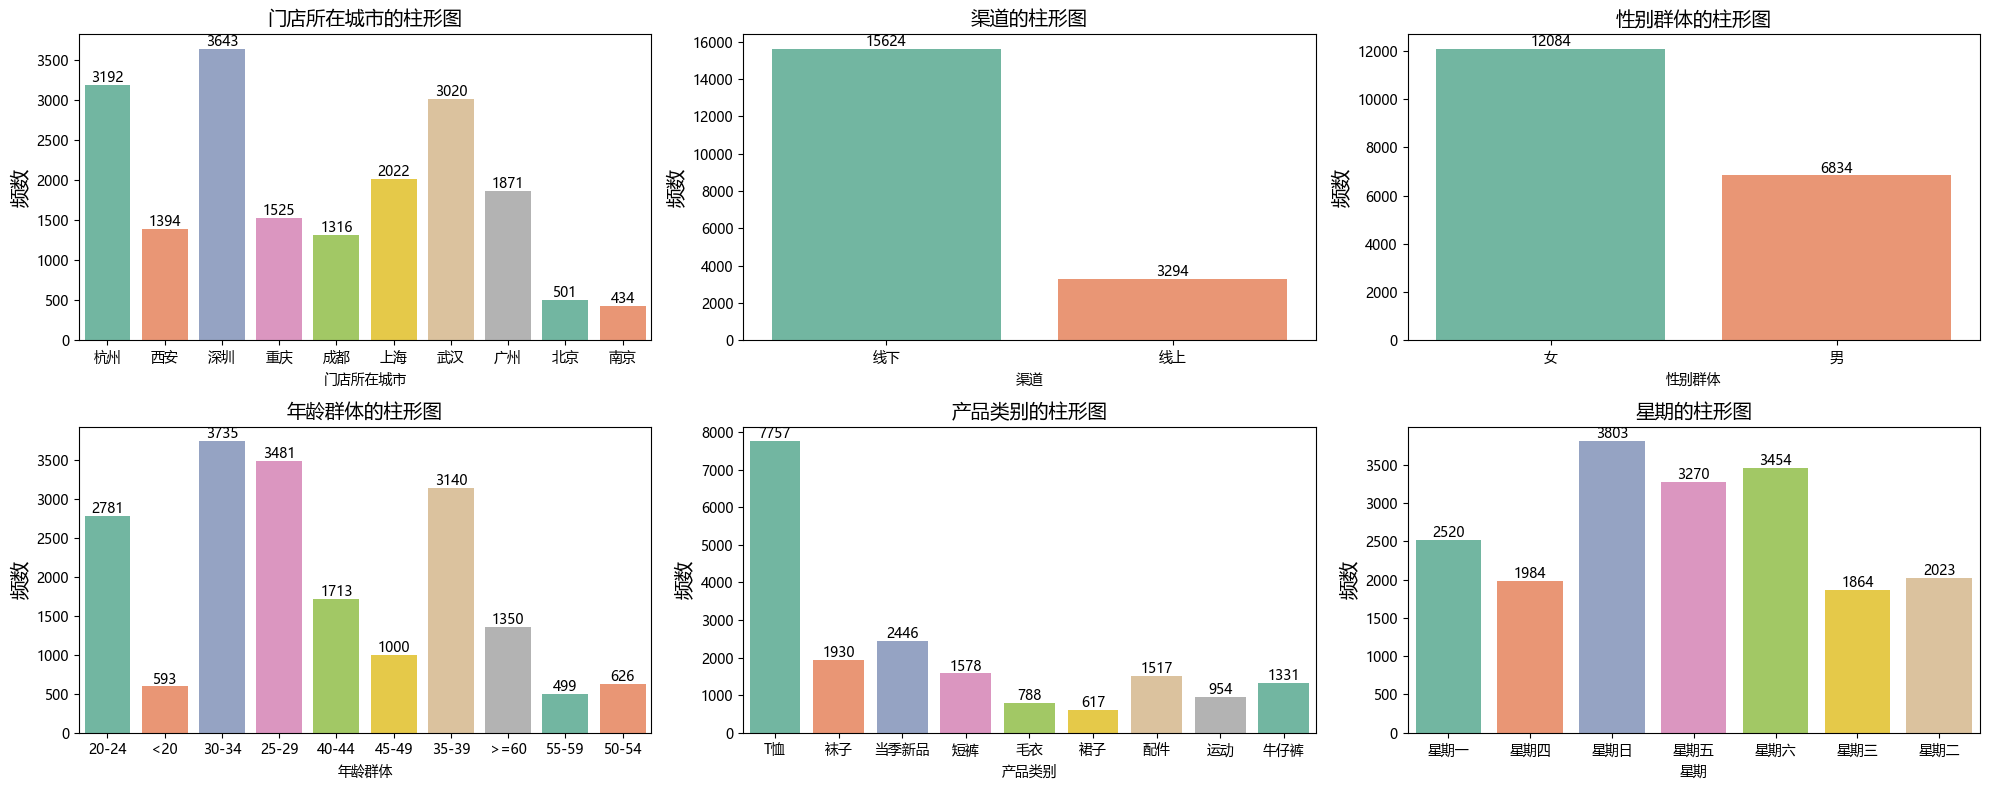

In [42]:
features = data.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(20,8))
for i,col in enumerate(features[1:],1):
    plt.subplot(2,3,i)
    sns.countplot(x=col,data=data,palette='Set2')
    plt.title(f'{col}的柱形图',fontsize=14)
    plt.ylabel('频数',fontsize=14)
    for p in plt.gca().patches:
        plt.gca().annotate(
            format(p.get_height(), '.0f'), 
            #label = '{:.0f}'.format(p.get_height())
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', 
            va = 'center', 
            xytext = (0, 5), 
            textcoords = 'offset points')
plt.tight_layout()
plt.show()

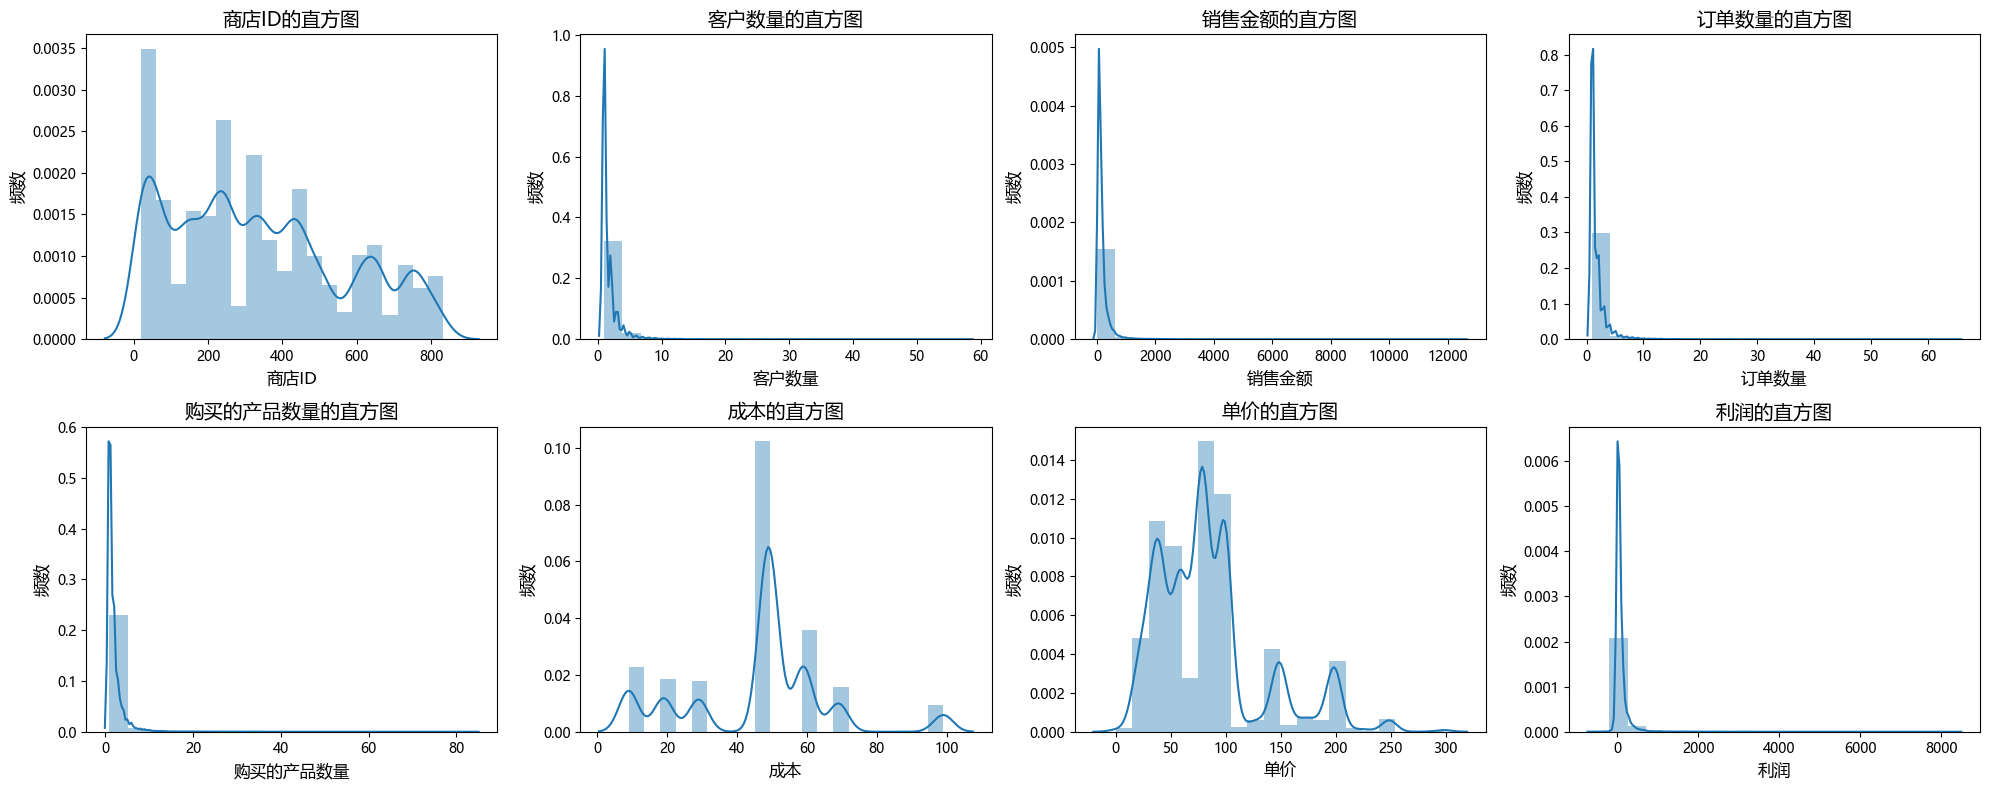

In [46]:
features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
features.insert(0,'商店ID')
plt.figure(figsize=(20, 8))
for i,col in enumerate(features,1):
    plt.subplot(2,4,i)
    sns.distplot(a=data[col],bins=20,kde=True)
    plt.title(f'{col}的直方图',fontsize=14)
    plt.ylabel('频数', fontsize=12)
    plt.xlabel(f'{col}', fontsize=12)
plt.tight_layout()
plt.show()

## 探索性分析

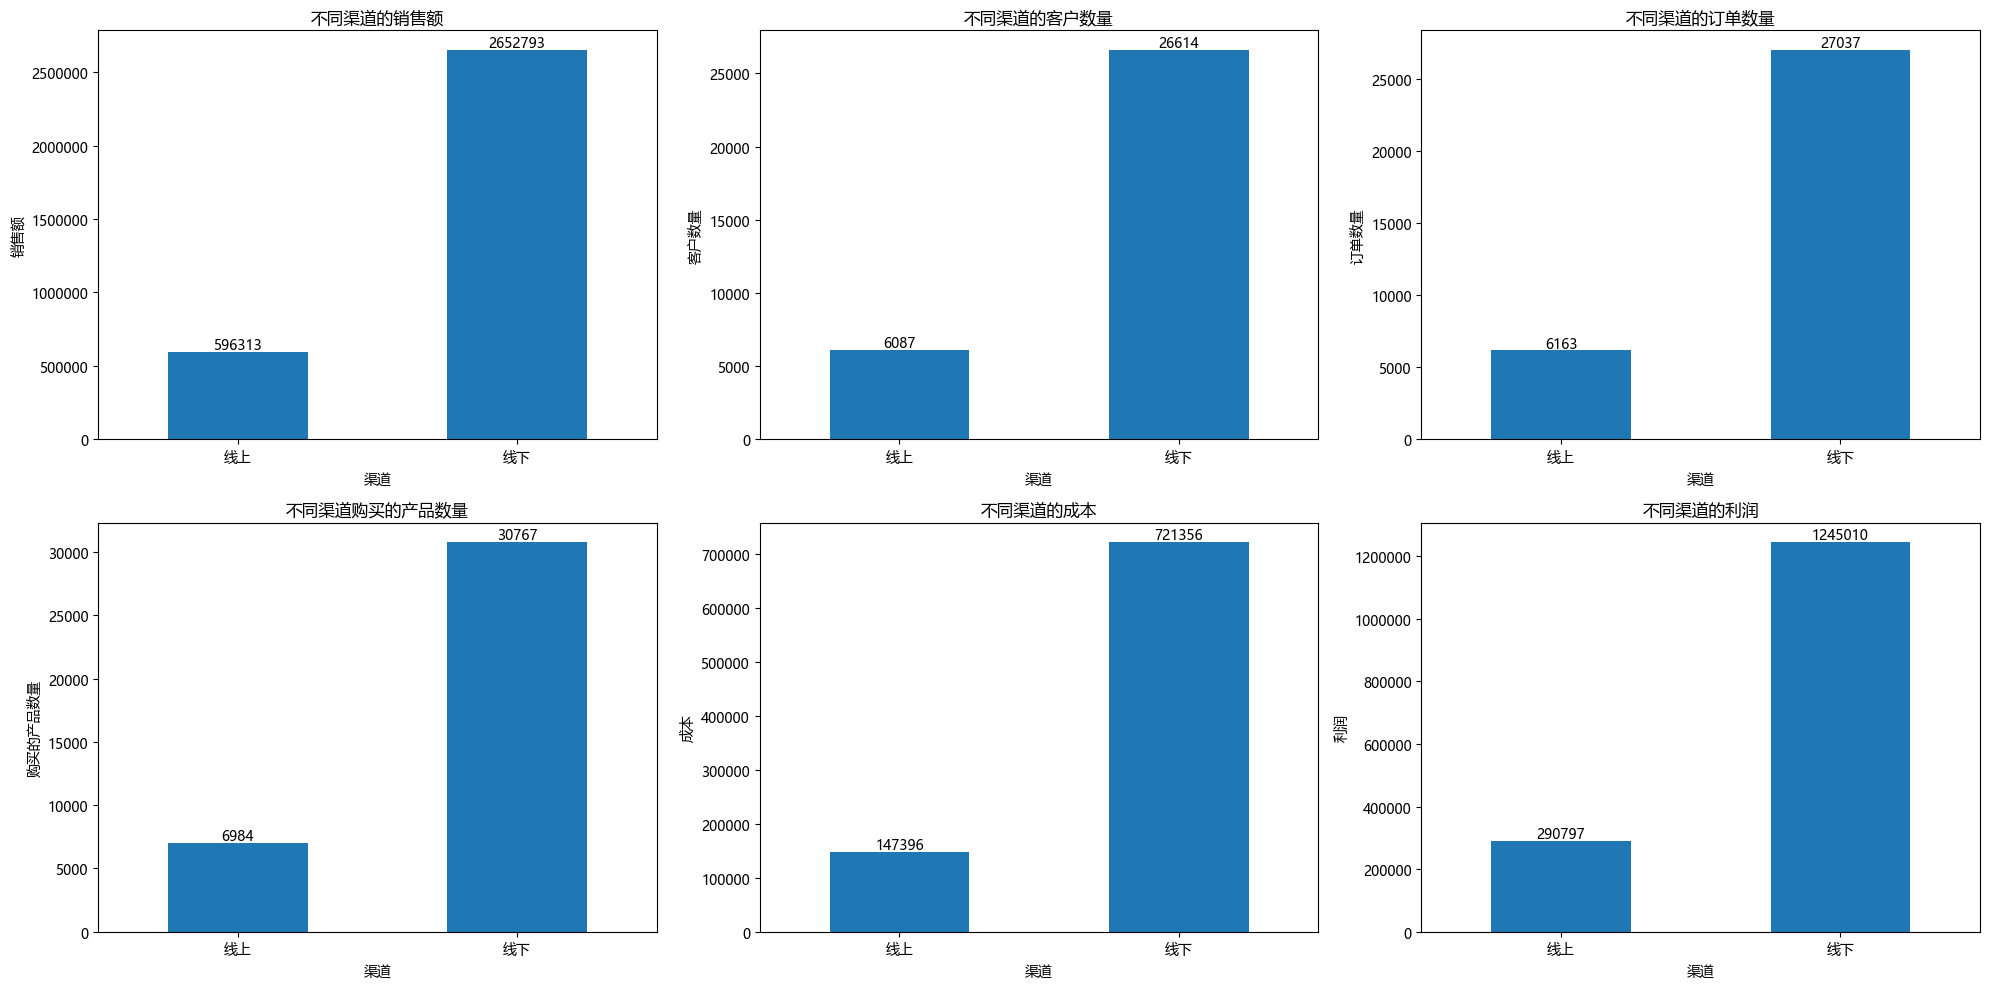

In [64]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
#不同渠道的销售额
way_sales = data.groupby('渠道')['销售金额'].sum()
way_sales.plot(kind='bar')
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=0)
plt.xlabel('渠道')
plt.ylabel('销售额')
plt.title('不同渠道的销售额')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 5), 
        textcoords = 'offset points'
        )

plt.subplot(2, 3, 2)
#不同渠道的客户数量
way_customers = data.groupby('渠道')['客户数量'].sum()
way_customers.plot(kind='bar')
plt.ticklabel_format(axis='y', style='plain')
plt.title('不同渠道的客户数量')
plt.xlabel('渠道')
plt.ylabel('客户数量')
plt.xticks(rotation=0)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 5), 
        textcoords = 'offset points'
        )
plt.subplot(2, 3, 3)
#不同渠道的订单数量
way_orders = data.groupby('渠道')['订单数量'].sum()
way_orders.plot(kind='bar')
plt.ticklabel_format(axis='y', style='plain')
plt.title('不同渠道的订单数量')
plt.xlabel('渠道')
plt.ylabel('订单数量')
plt.xticks(rotation=0)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 5), 
        textcoords = 'offset points'
        )
plt.subplot(2, 3, 4)
#不同渠道的购买的产品数量
way_products = data.groupby('渠道')['购买的产品数量'].sum()
way_products.plot(kind='bar')
plt.ticklabel_format(axis='y', style='plain')
plt.title('不同渠道购买的产品数量')
plt.xlabel('渠道')
plt.ylabel('购买的产品数量')
plt.xticks(rotation=0)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 5), 
        textcoords = 'offset points'
        )
plt.subplot(2, 3, 5)
#不同渠道的成本
way_cost = data.groupby('渠道')['成本'].sum()
way_cost.plot(kind='bar')
plt.ticklabel_format(axis='y', style='plain')
plt.title('不同渠道的成本')
plt.xlabel('渠道')
plt.ylabel('成本')
plt.xticks(rotation=0)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 5), 
        textcoords = 'offset points'
        )
plt.subplot(2, 3, 6)
#不同渠道的利润
way_profit = data.groupby('渠道')['利润'].sum()
way_profit.plot(kind='bar')
plt.ticklabel_format(axis='y', style='plain')
plt.title('不同渠道的利润')
plt.xlabel('渠道')
plt.ylabel('利润')
plt.xticks(rotation=0)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 5), 
        textcoords = 'offset points'
        )
plt.tight_layout()
plt.show()

## 性别群体与销售金额的关系分析

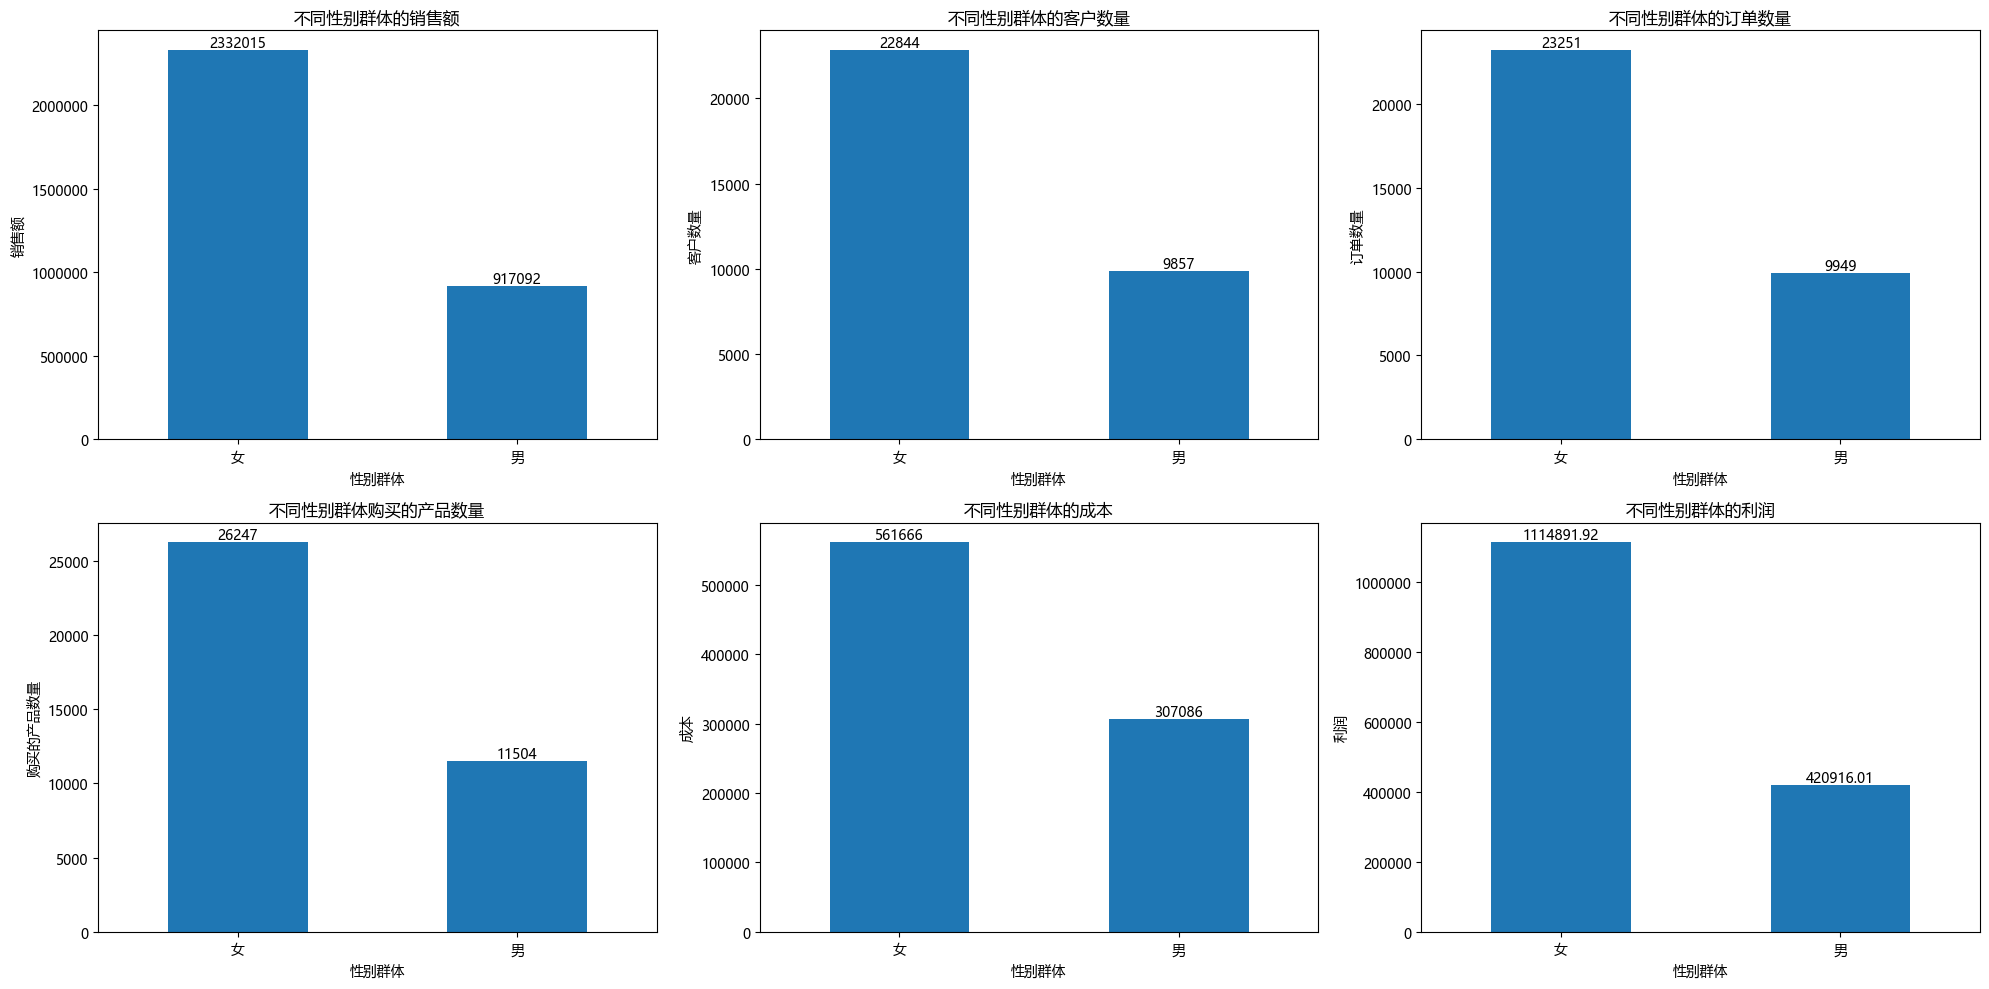

In [67]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
way_sales = data.groupby('性别群体')['销售金额'].sum()
way_sales.plot(kind='bar')
plt.title('不同性别群体的销售额')
plt.xlabel('性别群体')
plt.ylabel('销售额')
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='plain')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(2, 3, 2)
way_customers = data.groupby('性别群体')['客户数量'].sum()
way_customers.plot(kind='bar')
plt.title('不同性别群体的客户数量')
plt.xlabel('性别群体')
plt.ylabel('客户数量')
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='plain')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(2, 3, 3)
way_orders = data.groupby('性别群体')['订单数量'].sum()
way_orders.plot(kind='bar')
plt.title('不同性别群体的订单数量')
plt.xlabel('性别群体')
plt.ylabel('订单数量')
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='plain')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(2, 3, 4)
way_products = data.groupby('性别群体')['购买的产品数量'].sum()
way_products.plot(kind='bar')
plt.title('不同性别群体购买的产品数量')
plt.xlabel('性别群体')
plt.ylabel('购买的产品数量')
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='plain')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(2, 3, 5)
way_cost = data.groupby('性别群体')['成本'].sum()
way_cost.plot(kind='bar')
plt.title('不同性别群体的成本')
plt.xlabel('性别群体')
plt.ylabel('成本')
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='plain')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(2, 3, 6)
way_profit = data.groupby('性别群体')['利润'].sum()
way_profit.plot(kind='bar')
plt.title('不同性别群体的利润')
plt.xlabel('性别群体')
plt.ylabel('利润')
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='plain')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.tight_layout()
plt.show()

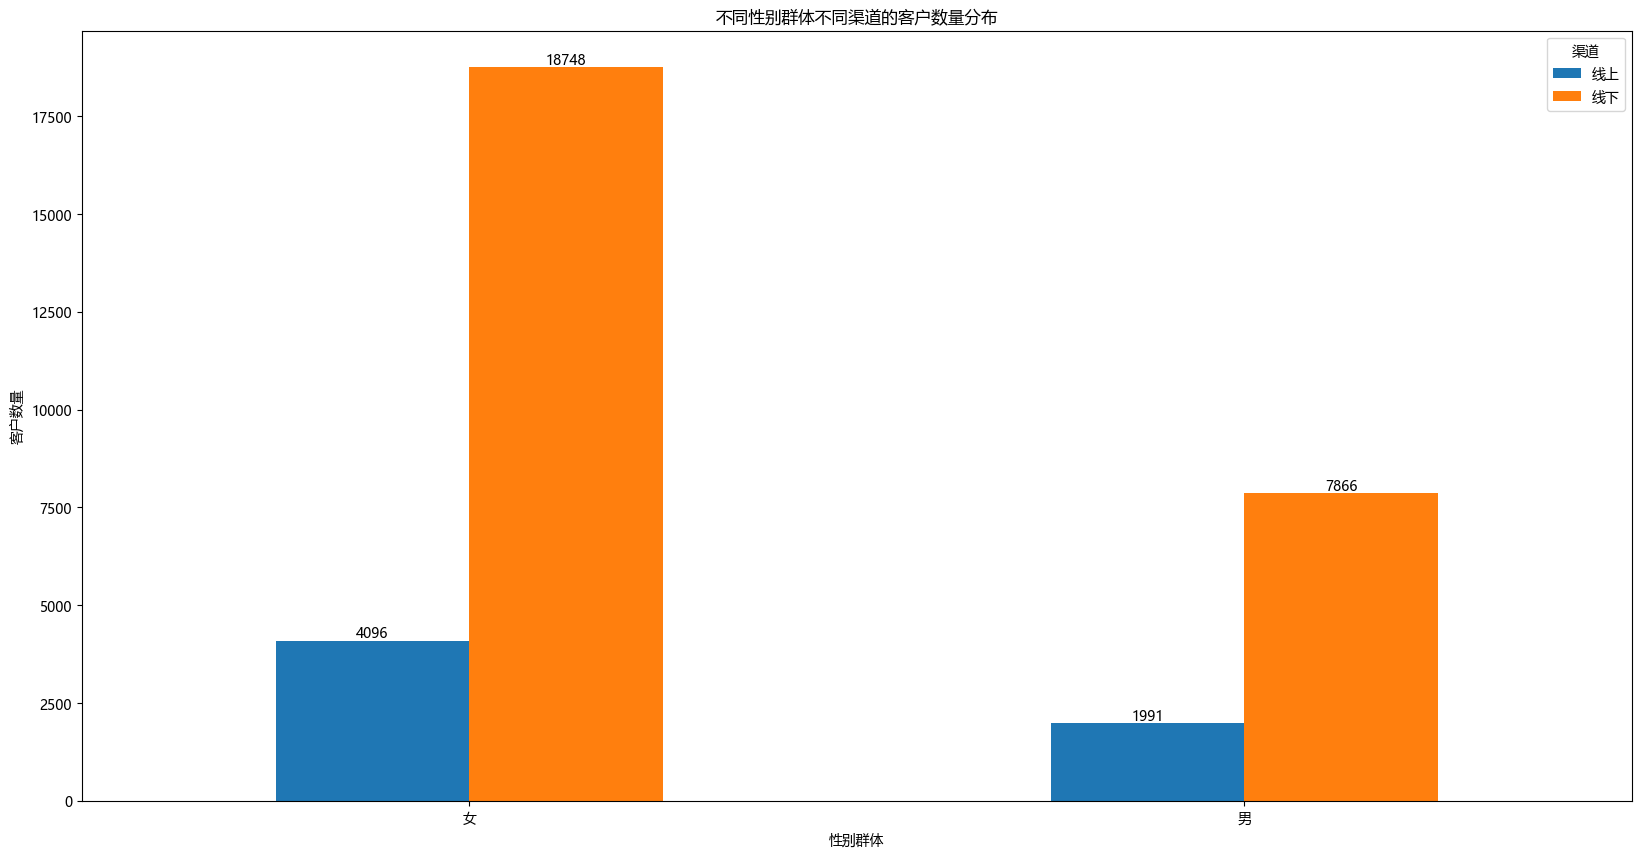

In [82]:
'''
data['性别群体'].isin(['女','男'])：使用 pandas 的 isin() 方法检查 性别群体 列中的元素是否在 ['女','男'] 列表中。
data[data['性别群体'].isin(['女','男'])]：将筛选出 性别群体 列中元素为 女 或 男 的行，形成一个新的 DataFrame。
'''
gender_channel_customer = data[data['性别群体'].isin(['女','男'])].groupby(["性别群体","渠道"])['客户数量'].sum()
'''
unstack() 是 pandas 中的一个方法，主要用于将 Series 或 DataFrame 的层级索引（Hierarchical Index）进行重塑操作，将内层的索引转换为列。
当你对一个 Series 或 DataFrame 进行分组操作（例如使用 groupby()）并执行聚合操作后，
结果可能是一个具有多层索引的 Series 或 DataFrame。
unstack() 方法可以将其中的一个层级的索引转换为列，从而将结果重塑为更方便查看和分析的表格形式。
'''
gender_channel_customer_un = gender_channel_customer.unstack()
#绘制柱状图
#stacked=False不堆叠，stacked=True堆叠
gender_channel_customer_un.plot(kind = 'bar',stacked=False,figsize=(20,10))
plt.title('不同性别群体不同渠道的客户数量分布')
plt.xlabel('性别群体')
plt.ylabel('客户数量')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 5), 
        textcoords = 'offset points')
plt.show()

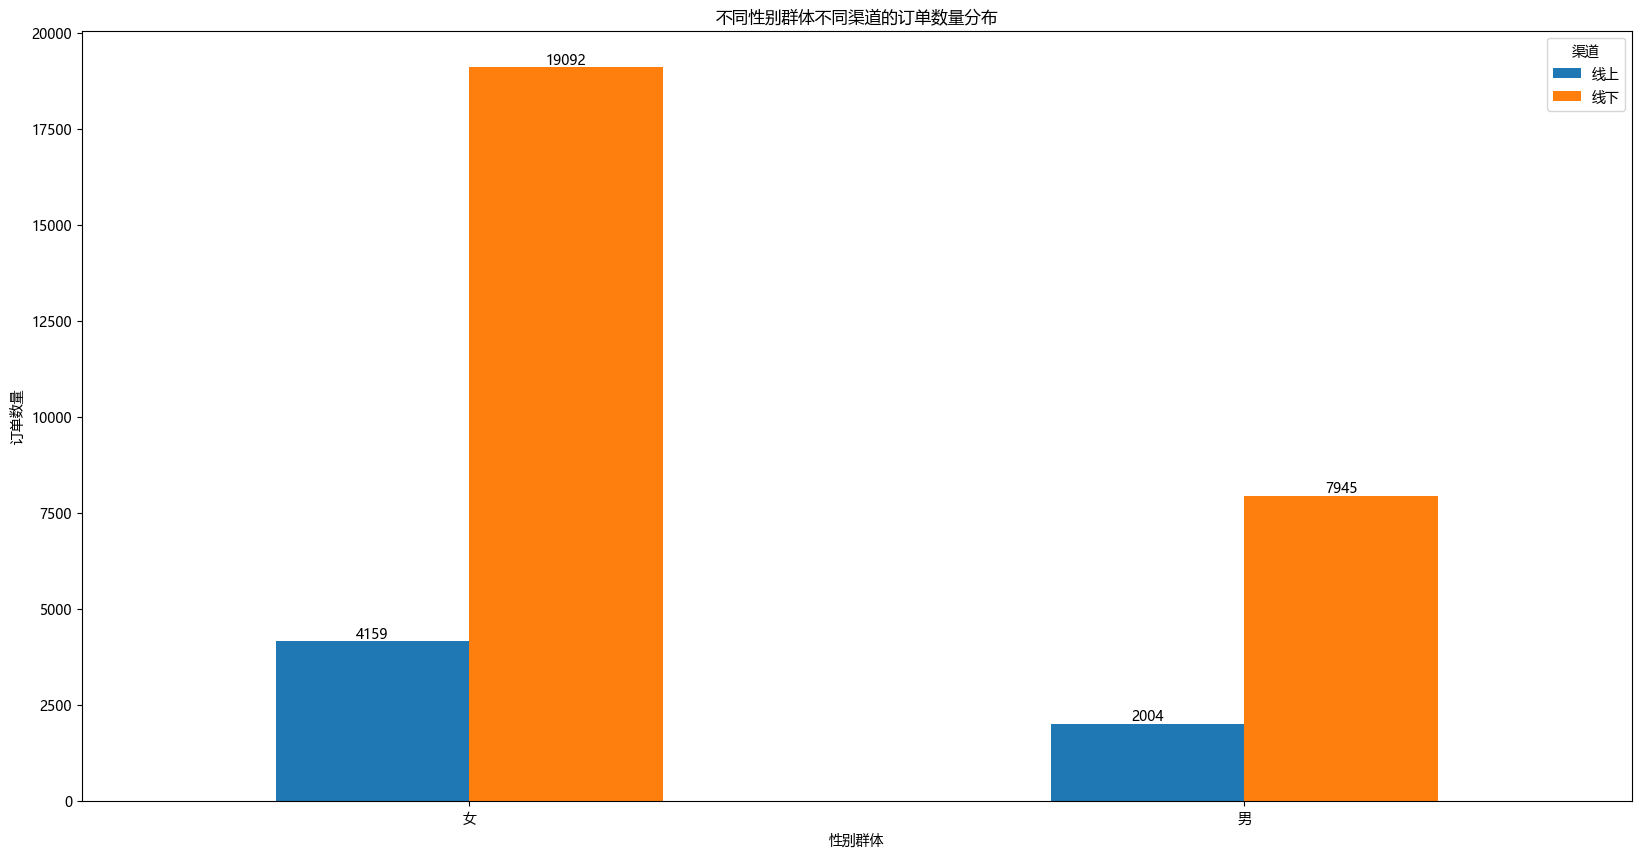

In [83]:
order_channel_customer = data[data['性别群体'].isin(['女','男'])].groupby(["性别群体","渠道"])['订单数量'].sum()
#绘制柱状图
order_channel_customer.unstack().plot(kind='bar', stacked=False, figsize=(20,10))
plt.title('不同性别群体不同渠道的订单数量分布')
plt.xlabel('性别群体')
plt.ylabel('订单数量')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), 
        ha = 'center', 
        va = 'center', xytext = (0, 5), 
        textcoords = 'offset points')
33plt.show()

## 门店所在城市与销售金额的关系分析

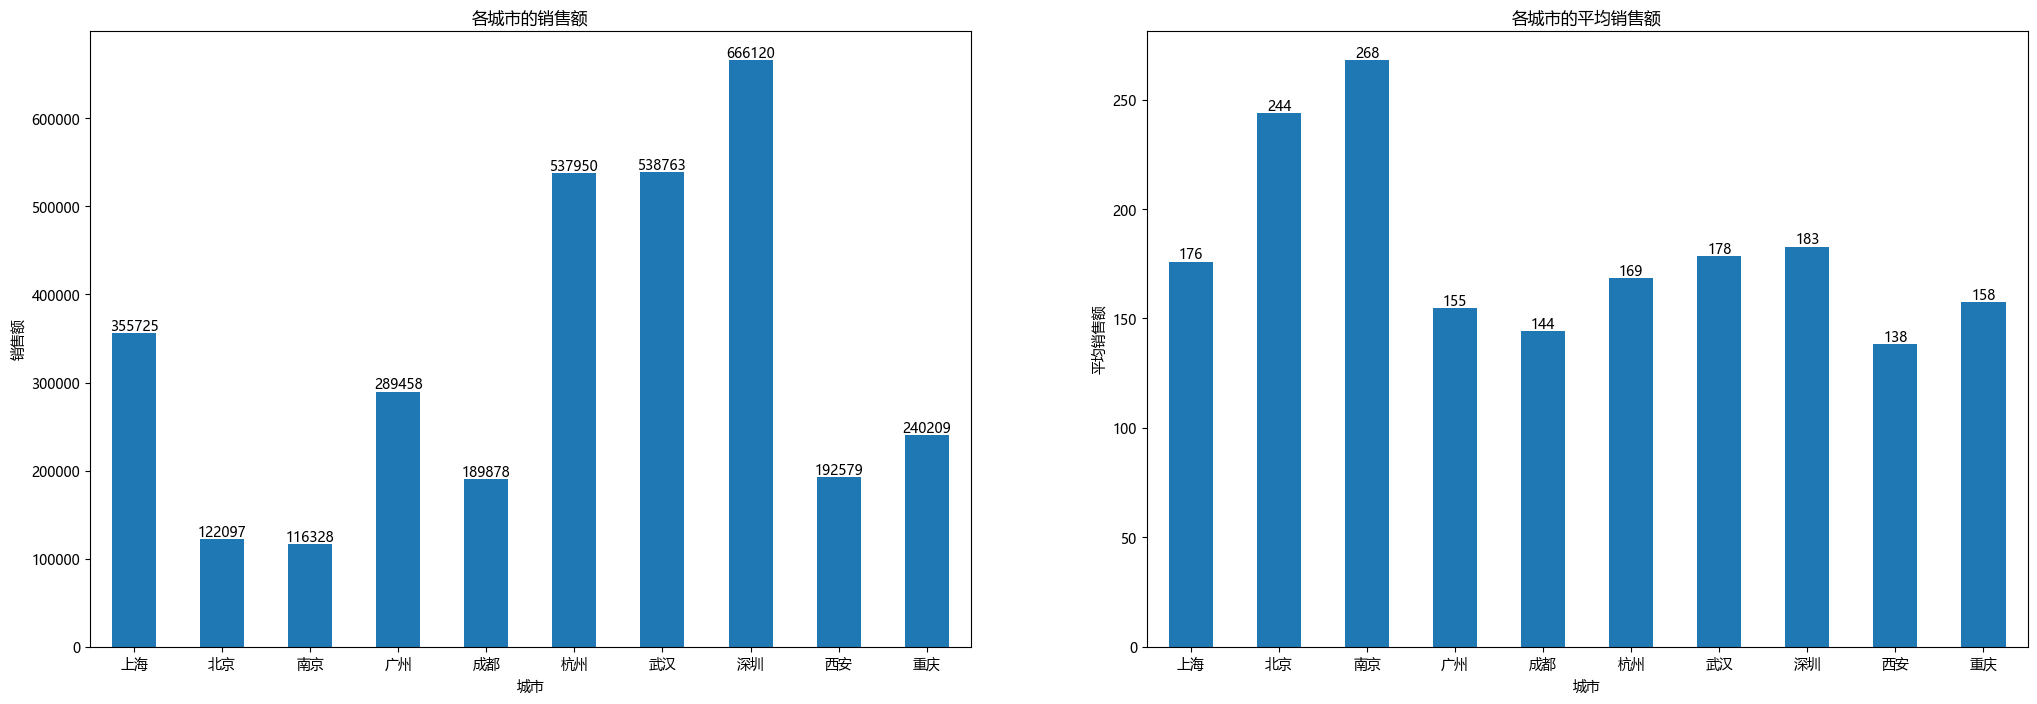

In [84]:
plt.figure(figsize=(25, 8))

plt.subplot(1, 2, 1)
city_sales = data.groupby('门店所在城市')['销售金额'].sum()
city_sales.plot(kind='bar')
plt.title('各城市的销售额')
plt.xlabel('城市')
plt.ylabel('销售额')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., 
         p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 5), 
        textcoords = 'offset points')

plt.subplot(1, 2, 2)
city_sales_avg = data.groupby('门店所在城市')['销售金额'].mean()
city_sales_avg.plot(kind='bar')
plt.title('各城市的平均销售额')
plt.xlabel('城市')
plt.ylabel('平均销售额')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center',
        va = 'center', 
        xytext = (0, 5), 
        textcoords = 'offset points')

plt.show()

* 总销售额以深圳居多。
* 平均销售额以南京为最。

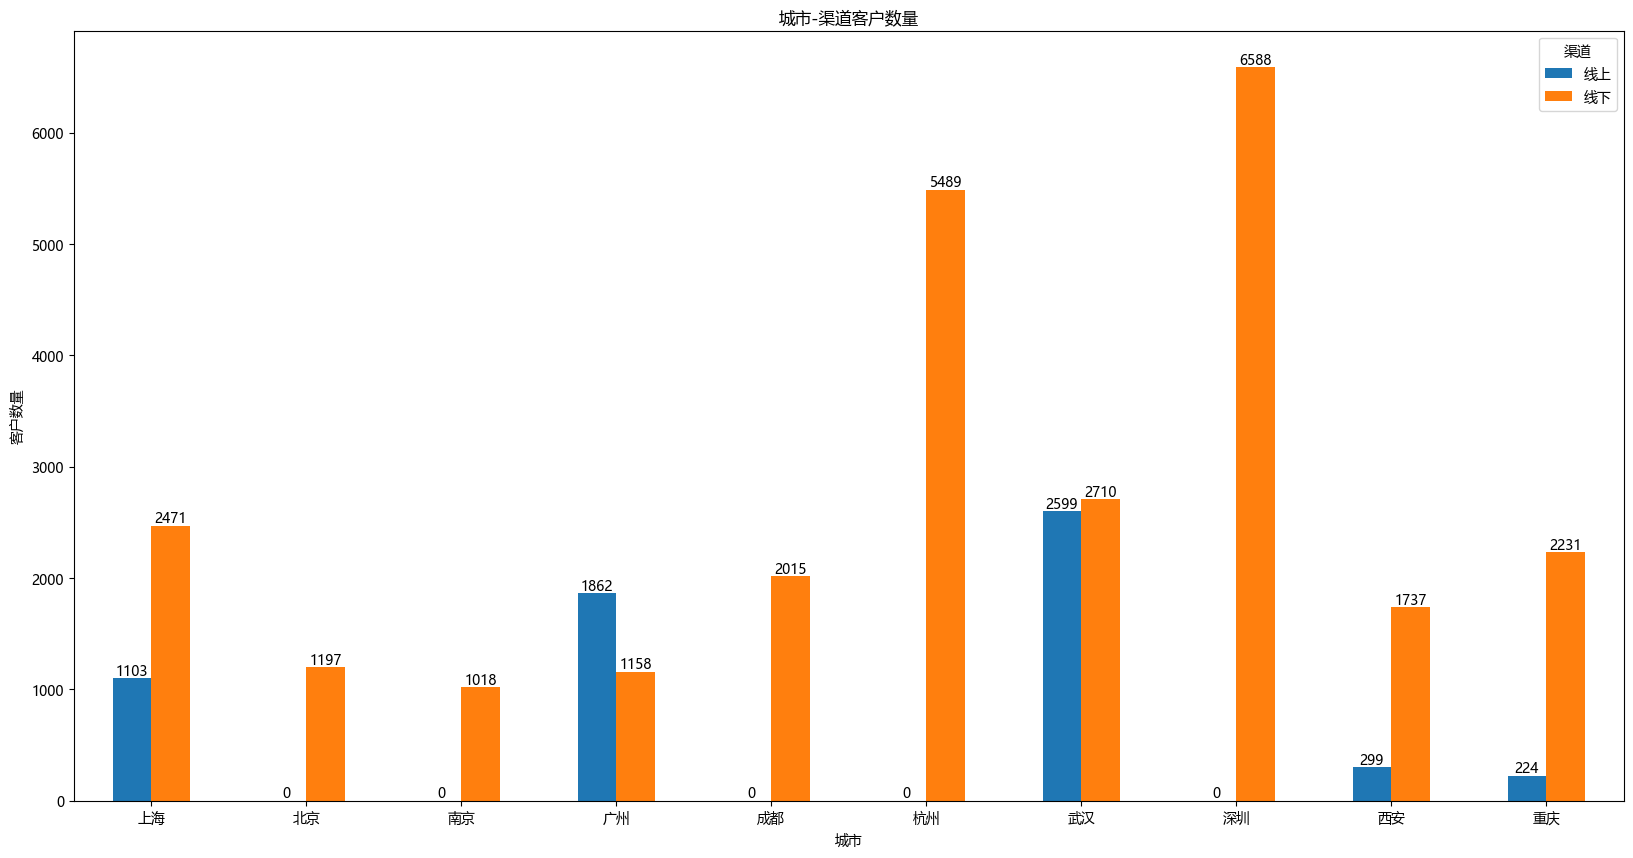

In [86]:
city_channel_customer =data.groupby(["门店所在城市", "渠道"])['客户数量'].sum()
city_channel_customer

#绘制柱状图
city_channel_customer.unstack().plot(kind='bar', stacked=False, figsize=(20, 10))
plt.title('城市-渠道客户数量')
plt.xlabel('城市')
plt.ylabel('客户数量')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., 
         p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 5), 
        textcoords = 'offset points')
plt.show()

* 北京、南京、成都、杭州、深圳均没有线上购买的数据，需要进一步确认是没有线上渠道还是其他原因。
* 除广州外，其他有线上渠道数据的城市中都是线下渠道的客户数量居多，说明线下渠道仍有较大发展空间。

## 年龄与销售金额的关系分析

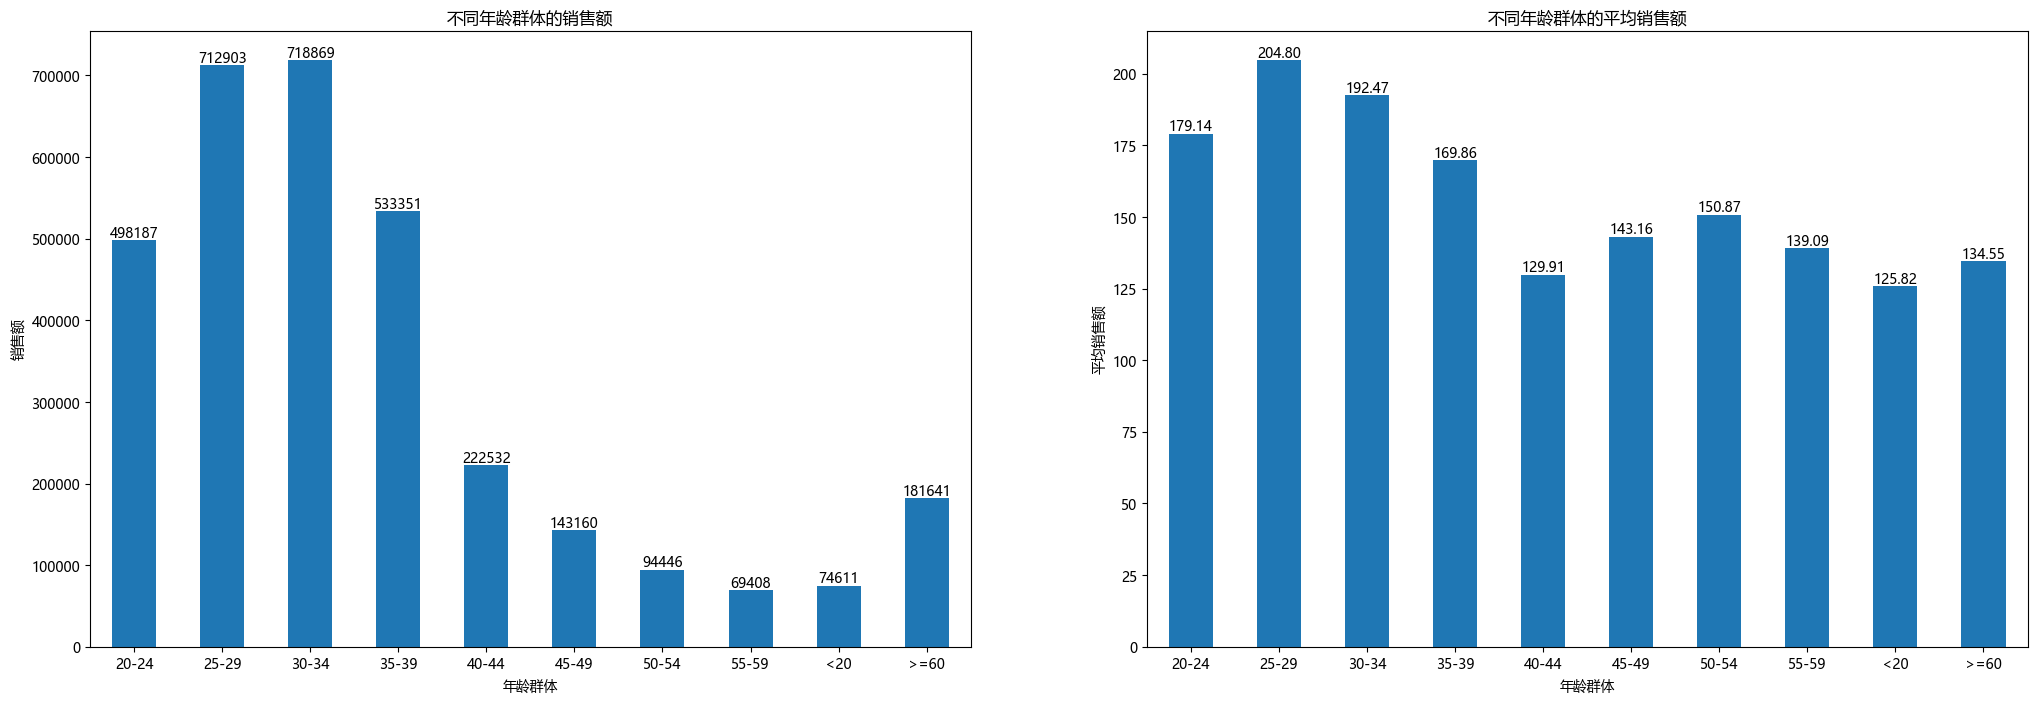

In [89]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
age_sales = data.groupby('年龄群体')['销售金额'].sum()
age_sales.plot(kind='bar')
plt.title('不同年龄群体的销售额')
plt.xlabel('年龄群体')
plt.ylabel('销售额')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', 
        va = 'center', 
        xytext = (0, 5),
        textcoords = 'offset points')

plt.subplot(1, 2, 2)
age_sales_avg = data.groupby('年龄群体')['销售金额'].mean()
age_sales_avg.plot(kind='bar')
plt.title('不同年龄群体的平均销售额')
plt.xlabel('年龄群体')
plt.ylabel('平均销售额')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(
        format(p.get_height(), '.2f'), 
        (p.get_x() + p.get_width() / 2., 
         p.get_height()),
        ha = 'center', 
        va = 'center', 
        xytext = (0, 5), 
        textcoords = 'offset points')

plt.show()

* 25-29岁、30-34岁顾客的消费金额最多，平均消费金额也最多，说明25-34岁的顾客购买力高

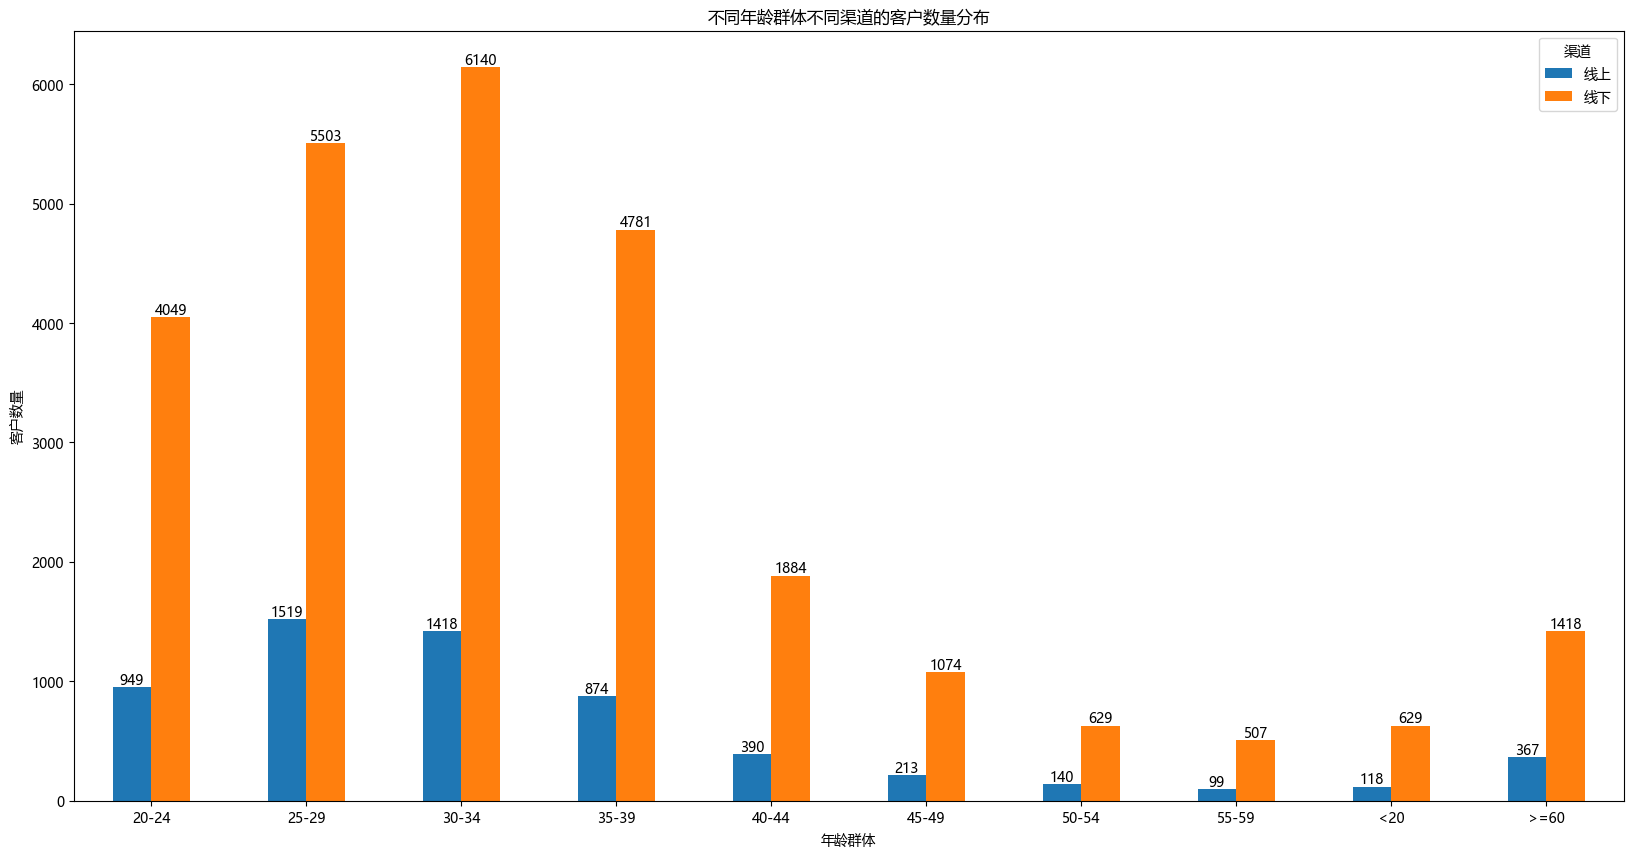

In [90]:
age_channel_customer = data[data['年龄群体'].isin(['20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','<20','>=60'])].groupby(["年龄群体","渠道"])['客户数量'].sum()
age_channel_customer

#绘制柱状图
age_channel_customer.unstack().plot(kind='bar', stacked=False, figsize=(20,10))
plt.title('不同年龄群体不同渠道的客户数量分布')
plt.xlabel('年龄群体')
plt.ylabel('客户数量')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* 30-34岁线下客户数量最多

## 产品类别与销售金额的关系分析

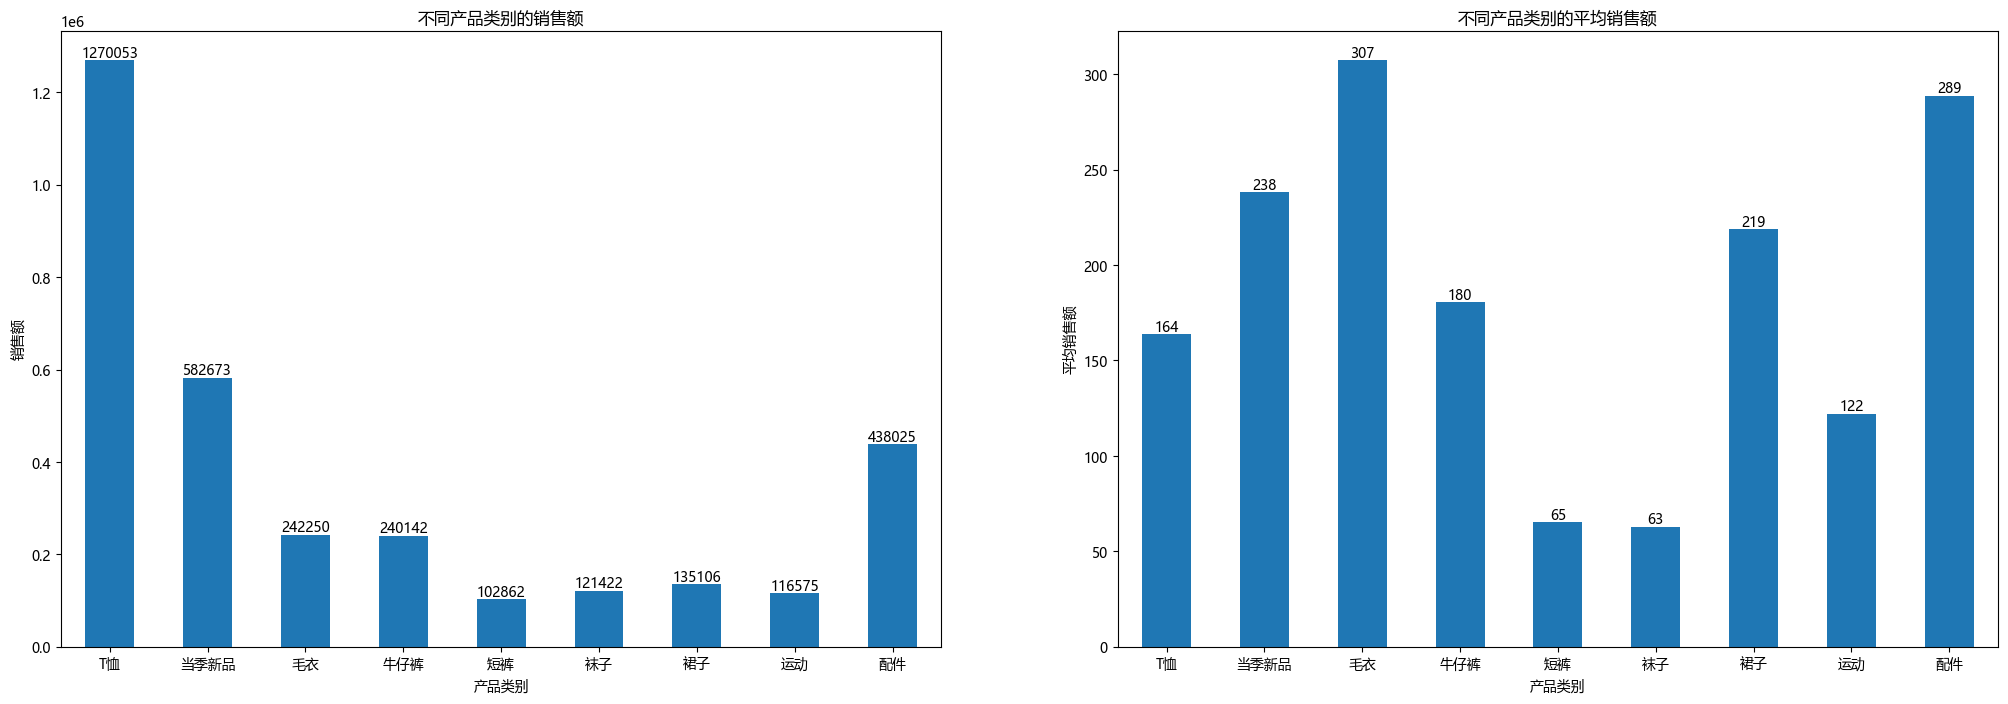

In [91]:
plt.figure(figsize=(25,8))

plt.subplot(1, 2, 1)
product_sales = data.groupby('产品类别')['销售金额'].sum()
product_sales.plot(kind='bar')
plt.title('不同产品类别的销售额')
plt.xlabel('产品类别')
plt.ylabel('销售额')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(1, 2, 2)
product_sales_avg = data.groupby('产品类别')['销售金额'].mean()
product_sales_avg.plot(kind='bar')
plt.title('不同产品类别的平均销售额')
plt.xlabel('产品类别')
plt.ylabel('平均销售额')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

* T恤的销售总额最高
* 毛衣的平均销售金额最高，其次是配件

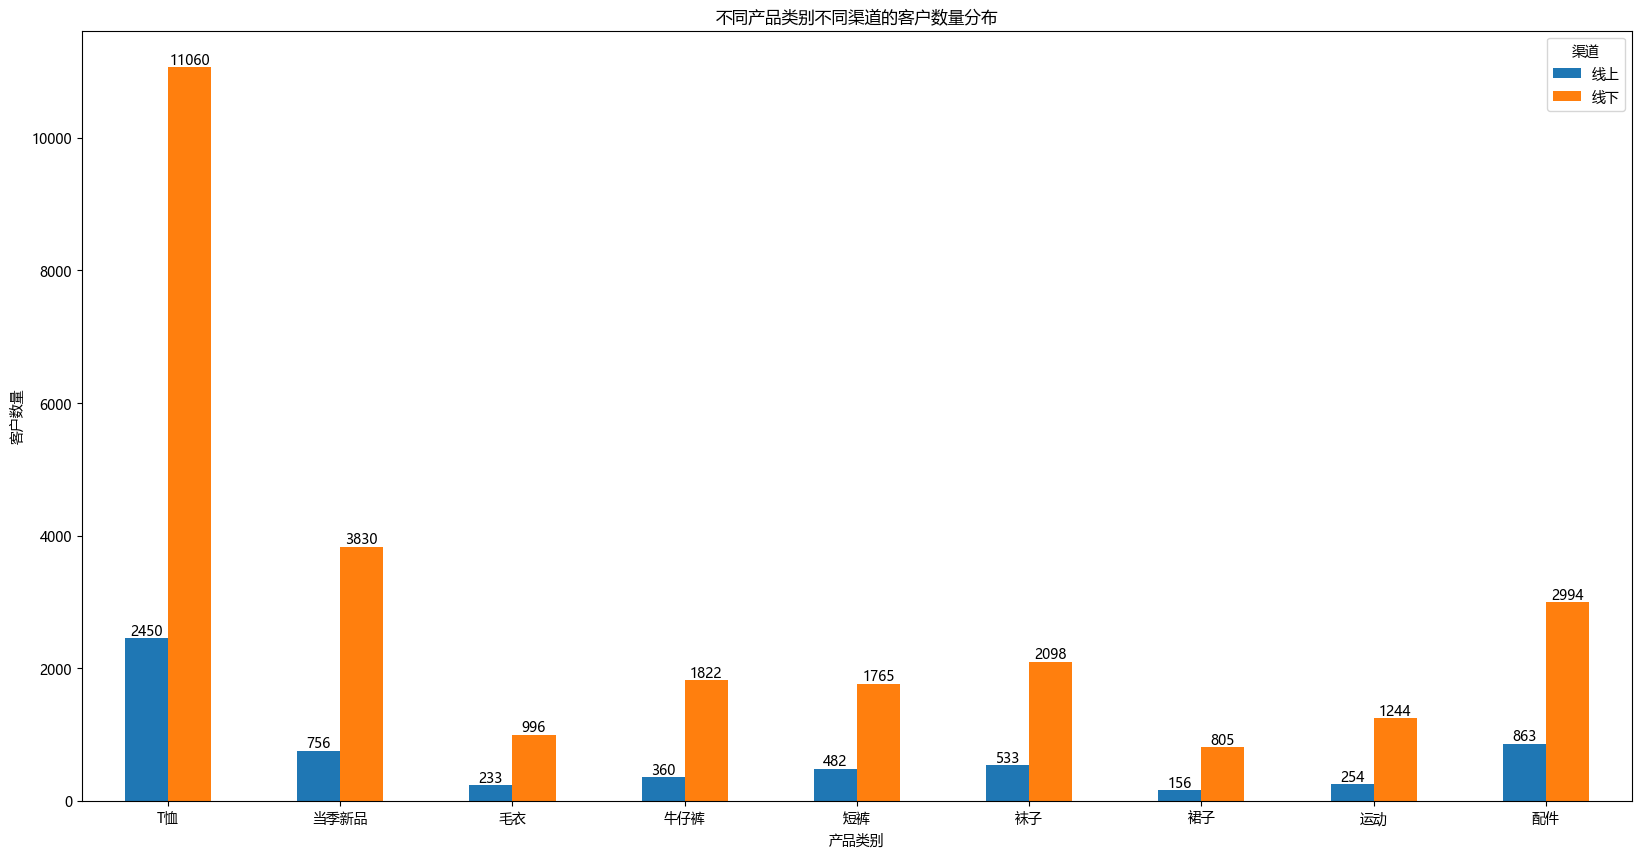

In [92]:
product_channel_customer = data[data['产品类别'].isin(['T恤','当季新品','毛衣','牛仔裤','短裤','袜子','裙子','运动','配件'])].groupby(["产品类别","渠道"])['客户数量'].sum()
product_channel_customer

#绘制柱状图
product_channel_customer.unstack().plot(kind='bar', stacked=False, figsize=(20,10))
plt.title('不同产品类别不同渠道的客户数量分布')
plt.xlabel('产品类别')
plt.ylabel('客户数量')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

* 全产品线都是线下客户数量高于线上，其中T恤类产品的线下客户数量最多，说明T恤具有高市场需求。

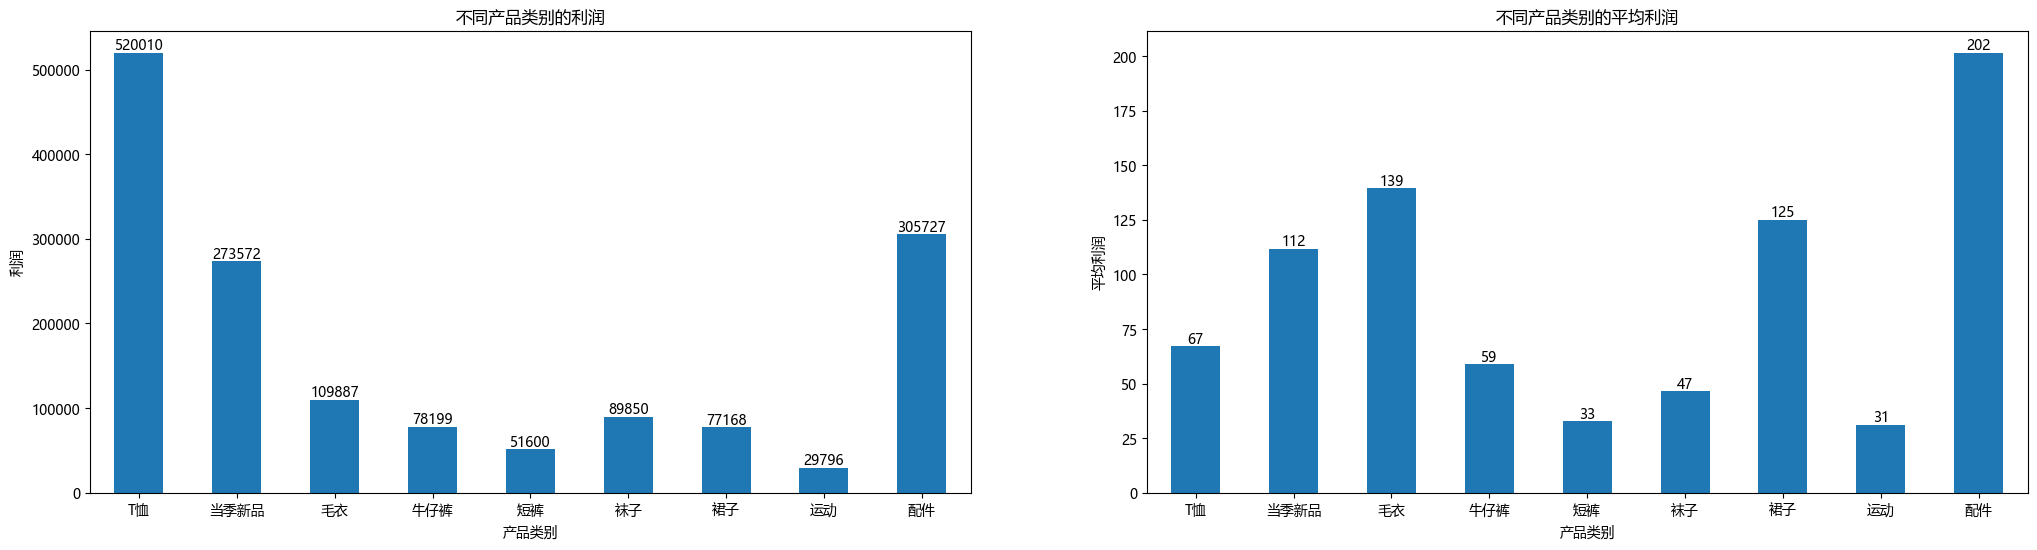

In [93]:
product_profits = data.groupby('产品类别')['利润'].sum()
product_profits


plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
product_profits.plot(kind='bar')
plt.title('不同产品类别的利润')
plt.xlabel('产品类别')
plt.ylabel('利润')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(1, 2, 2)
product_profits_avg = data.groupby('产品类别')['利润'].mean()
product_profits_avg.plot(kind='bar')
plt.title('不同产品类别的平均利润')
plt.xlabel('产品类别')
plt.ylabel('平均利润')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

In [105]:
profit_max

,产品类别,利润,成本
0,T恤,67.037478,49.0
1,当季新品,111.844530,59.0
2,毛衣,139.450254,99.0
3,牛仔裤,58.752427,69.0
4,短裤,32.699544,19.0
5,袜子,46.554259,9.0
6,裙子,125.069335,59.0
7,运动,31.232369,49.0
8,配件,201.534047,29.0


* T恤的总利润最高
* 件的平均利润最高

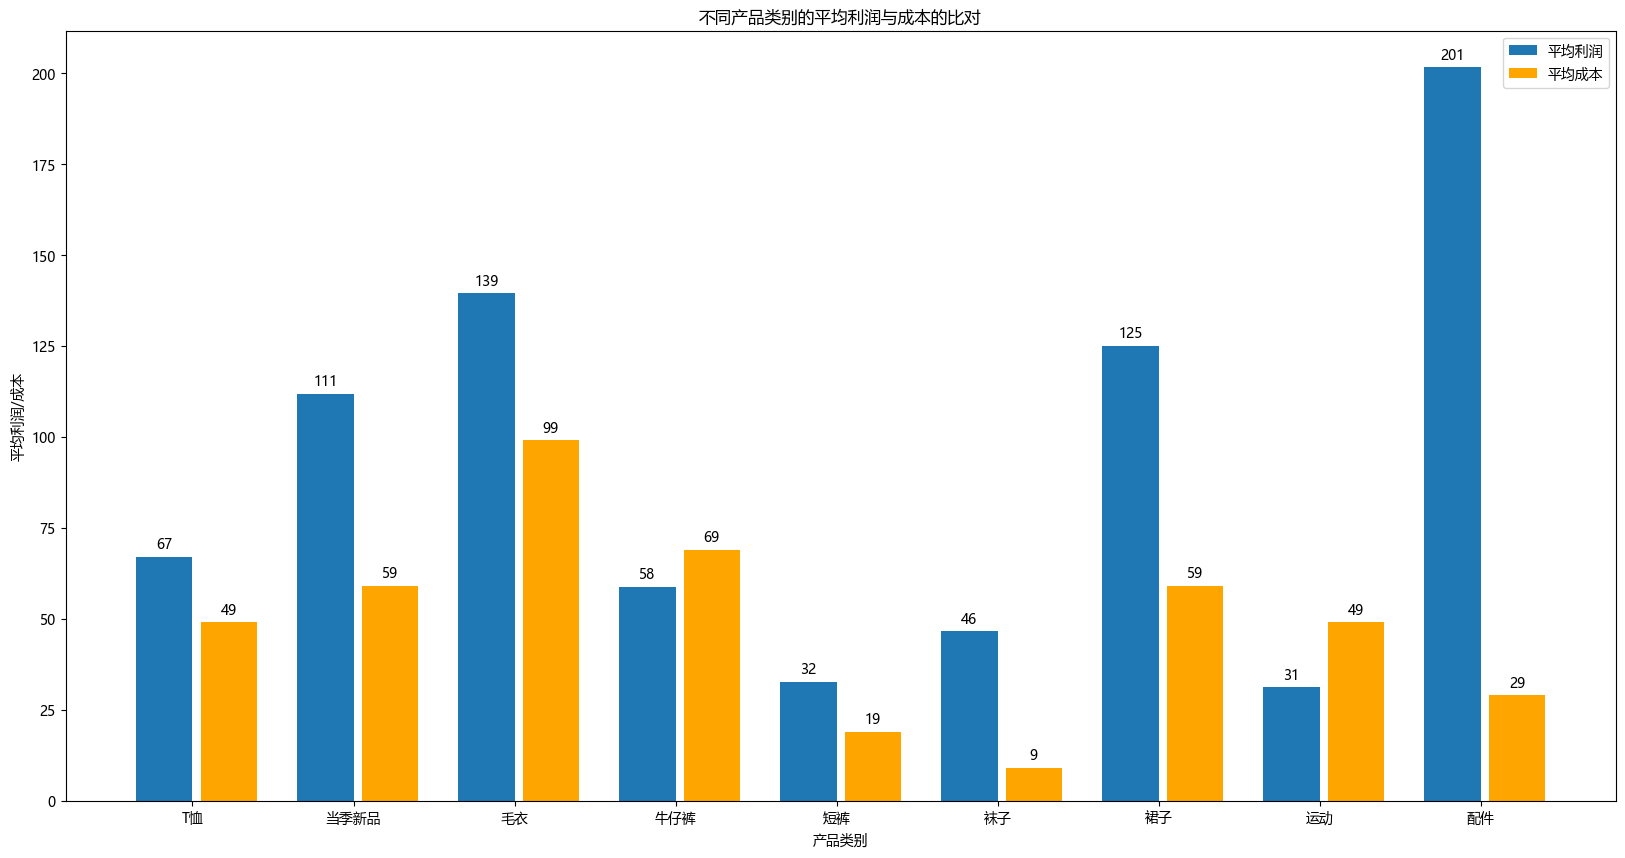

In [104]:
# 计算每个产品类别的平均利润和成本
profit_max = data.groupby("产品类别").agg({"利润":"mean", "成本":"mean"}).reset_index()
# 绘制双柱状图
#plt.subplots(figsize=(20, 10))：创建一个大小为 (20, 10) 的图形，并返回 fig（图形对象）和 ax（轴对象）
fig, ax = plt.subplots(figsize=(20, 10))
# 计算柱状图的宽度和位置
bar_width = 0.35  # 柱状图的宽度
index = np.arange(len(profit_max))  # x轴的位置
# 绘制平均利润柱状图
bars1 = ax.bar(index, profit_max['利润'], bar_width, label='平均利润')

# 绘制平均成本柱状图
bars2 = ax.bar(index + bar_width+0.05, profit_max['成本'], bar_width, label='平均成本', color='orange')
plt.title('不同产品类别的平均利润与成本的比对')
plt.xlabel('产品类别')
plt.ylabel('平均利润/成本')

# 设置x轴标签
plt.xticks(index + bar_width / 2, profit_max['产品类别'])  # 设置x轴刻度标签和位置

# 在柱状图上添加数值标签
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        # 格式化字符串，只显示整数部分，不显示小数点
        ax.annotate('{}'.format(int(height)),  # 使用int()函数转换为整数
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3点垂直偏移
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
# 添加图例
plt.legend()

plt.show()

* 牛仔裤和运动类的平均利润低于成本价，说明这两类相当于在亏本销售的
* 配件的利润最高

## 销售时间与销售金额的关系分析

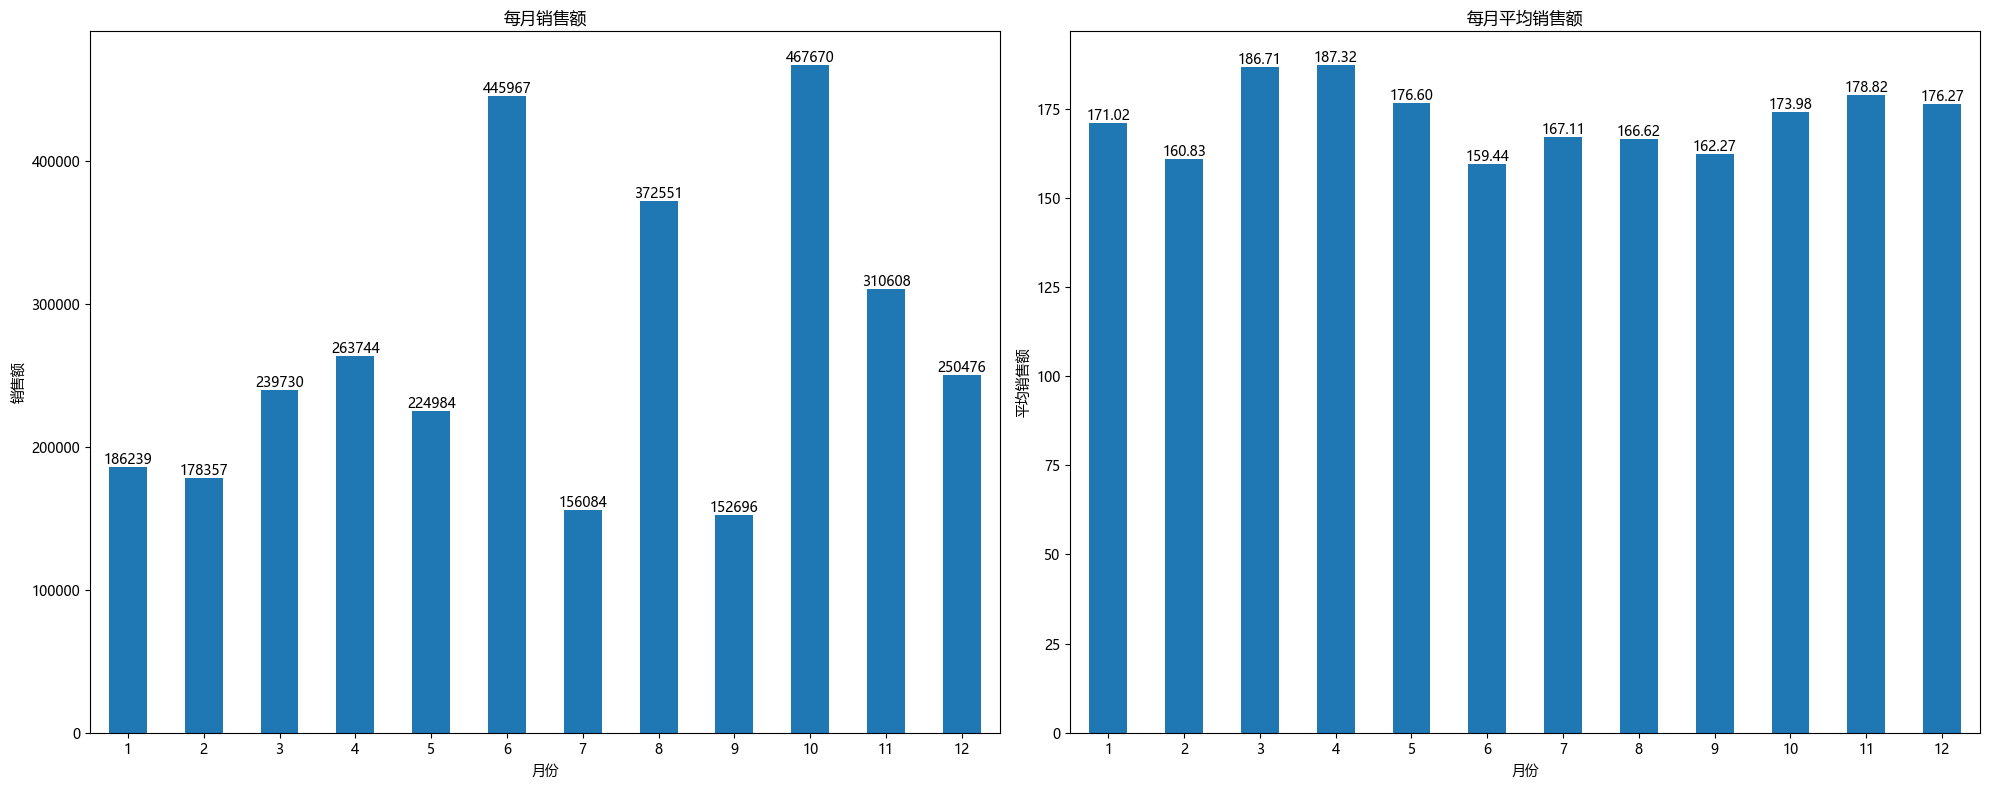

In [110]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
#计算每月销售额
data_month = data.groupby(data['订单日期'].dt.month)['销售金额'].sum()
data_month.plot(kind='bar')
plt.title('每月销售额')
plt.xlabel('月份')
plt.ylabel('销售额')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.subplot(1,2,2)
data_month_avg = data.groupby(data['订单日期'].dt.month)['销售金额'].mean()
data_month_avg.plot(kind='bar')
plt.title('每月平均销售额')
plt.xlabel('月份')
plt.ylabel('平均销售额')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

* 10月销售额最高，其次为6月。
* 4月平均销售额最高，其次为3月

In [111]:
#计算时间，当星期等于星期六或日，则输出“周末”，否则输出“工作日”。
data['时间'] = '工作日'
data.loc[data['星期'].isin(['星期六', '星期日']), '时间'] = '周末'

# 显示DataFrame的前几行
data.head()

,商店ID,门店所在城市,渠道,性别群体,年龄群体,产品类别,客户数量,销售金额,订单数量,购买的产品数量,成本,单价,利润,订单日期,星期,is_isnull,is_duplicate,时间
0,831.0,杭州,线下,女,20-24,T恤,1.0,59.0,1.0,1.0,49.0,59.0,10.0,2023-01-02,星期一,False,False,工作日
1,831.0,杭州,线下,女,20-24,袜子,1.0,40.0,1.0,2.0,9.0,20.0,22.0,2023-01-05,星期四,False,False,工作日
2,831.0,杭州,线下,女,<20,T恤,1.0,79.0,1.0,1.0,49.0,79.0,30.0,2023-01-08,星期日,False,False,周末
3,831.0,杭州,线下,男,30-34,T恤,1.0,99.0,1.0,1.0,49.0,99.0,50.0,2023-01-09,星期一,False,False,工作日
4,831.0,杭州,线下,男,30-34,T恤,1.0,79.0,1.0,1.0,49.0,79.0,30.0,2023-01-09,星期一,False,False,工作日


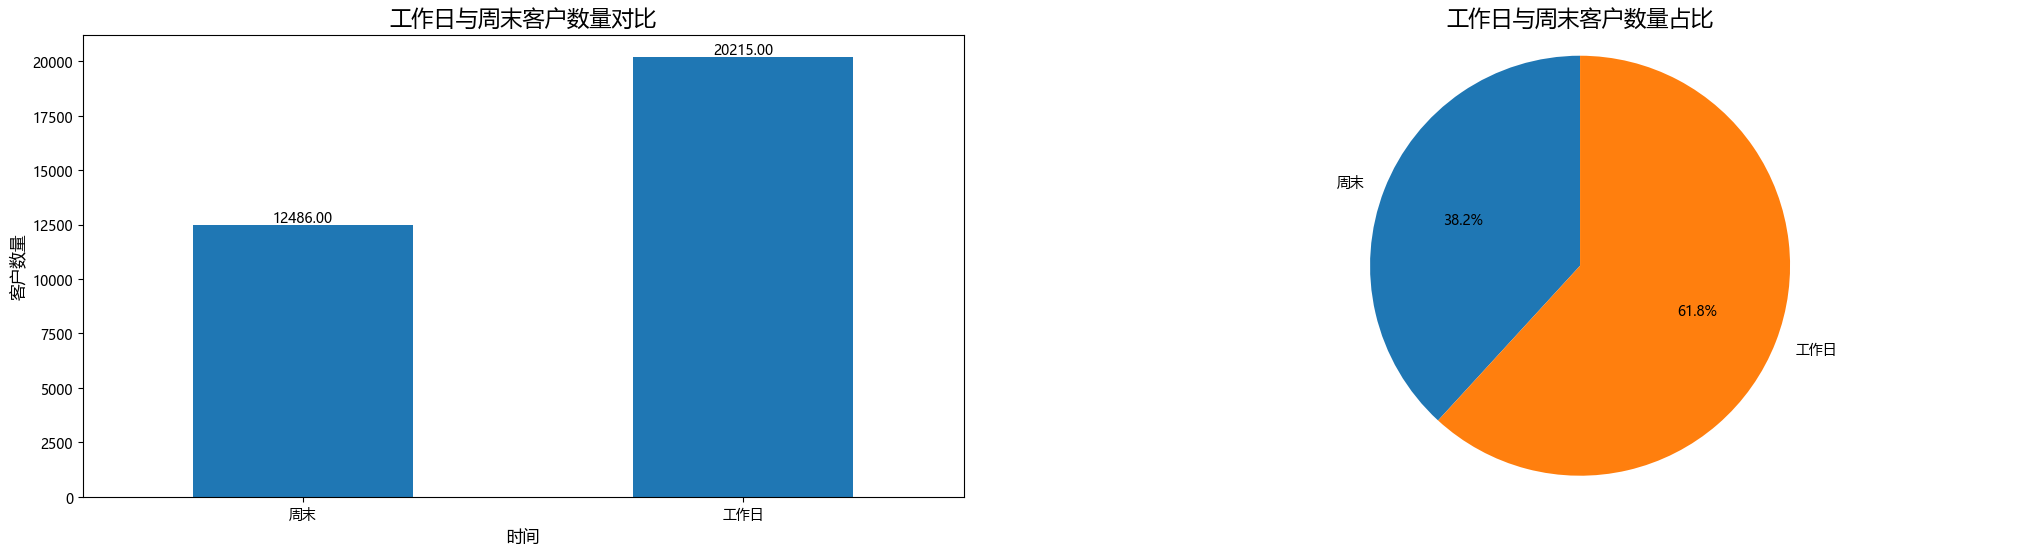

In [116]:
weekend_customers = data.groupby("时间")["客户数量"].sum().sort_values()
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
weekend_customers.plot(kind="bar")
plt.title("工作日与周末客户数量对比", fontsize=16)
plt.xlabel("时间", fontsize=12)
plt.ylabel("客户数量", fontsize=12)
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.subplot(1, 2, 2)
# 计算工作日客户数量占比
plt.pie(weekend_customers, labels=weekend_customers.index, autopct="%1.1f%%", startangle=90)
plt.title("工作日与周末客户数量占比", fontsize=16)
#保证饼图是圆形，而不是椭圆形
plt.axis("equal")
plt.show() 

## 工作日的客户数量高于周末

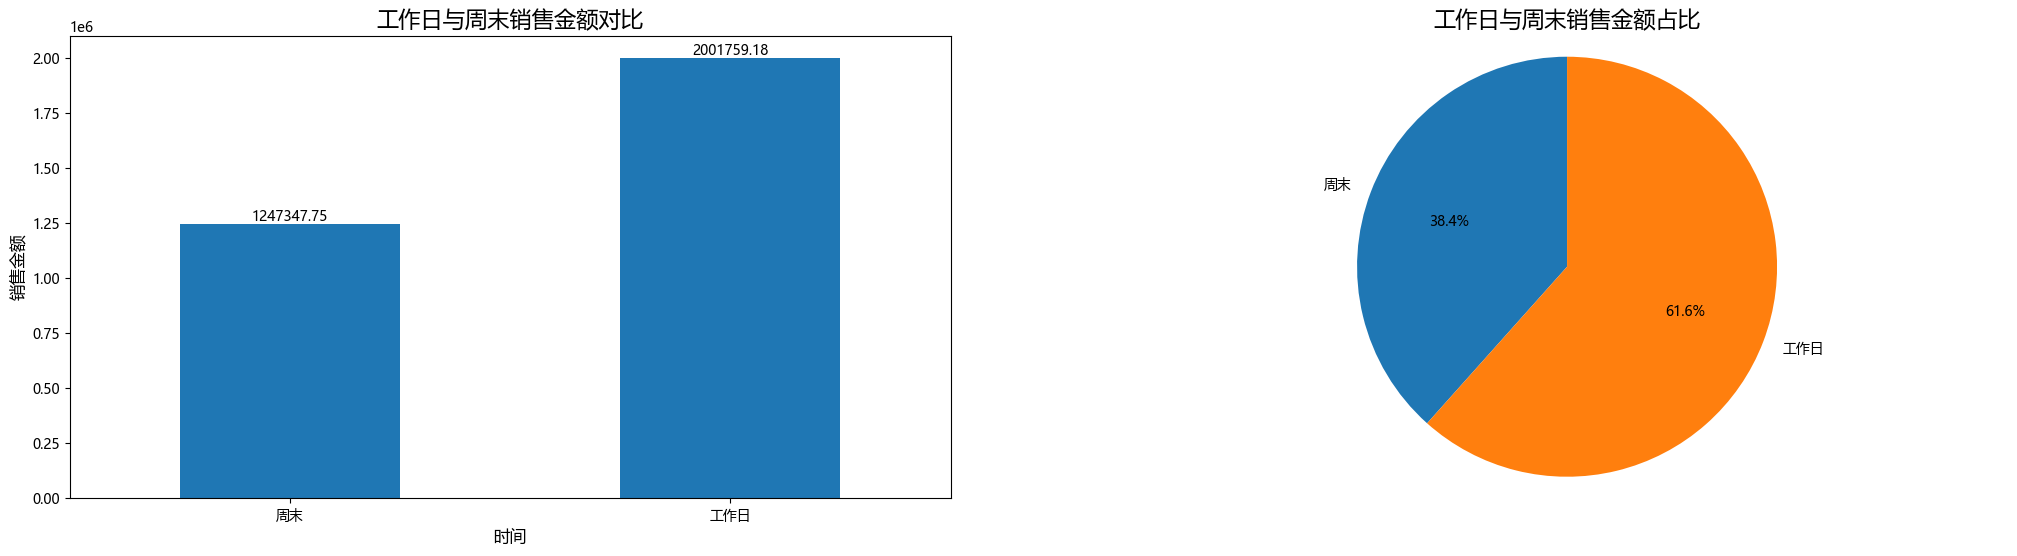

In [119]:
weekend_total_sales = data.groupby("时间")["销售金额"].sum()
plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
weekend_total_sales.plot(kind="bar")
plt.title("工作日与周末销售金额对比", fontsize=16)
plt.xlabel("时间", fontsize=12)
plt.ylabel("销售金额", fontsize=12)
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(1, 2, 2)
plt.pie(weekend_total_sales, labels=weekend_total_sales.index, autopct="%1.1f%%", startangle=90)
plt.title("工作日与周末销售金额占比", fontsize=16)
plt.axis("equal")
plt.show() 